# **Analysing Historical Data on Fatalities between Israelis and Palestinians**

Much has been said about the conflicts between Israel and Palestine over disputed territory. Obviously, Palestine is the weaker side in this conflict, seeking the right to guaranteed sovereignty in the region from international bodies such as the UN (United Nations Organisation), of which they claim to be the true owners of the region belonging to the state of Israel. It is also worth remembering the existence of terrorist groups in the region, such as Hamas, which seeks the destruction of the state of Israel, and it is worth remembering that these terrorists, although they are Palestinians, do not represent the Palestinian state. Both sides claim to be the owners of that region, however in this analysis, we will restrain ourselves to analysing only the number of fatalities in this region.

## **Objective:**


To analyse the numbers of fatalities in the region. The data was catalogued from 2000 to 2023.


**Data source:** [Fatalities in the Israeli & Palestinian](https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian/code)


**Region to be analysed:**

![Fonte: The Globe Post](https://theglobepost.com/wp-content/uploads/2018/11/Israel-and-Gaza.jpg)



# Collecting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
dfFatalitiesIsraeliPalestinian = pd.read_csv('/kaggle/input/fatalities-in-the-israeli-palestinian/fatalities_isr_pse_conflict_2000_to_2023.csv')

# Cleaning and Preparing the Data

### First impressions

In [3]:
dfFatalitiesIsraeliPalestinian.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
dfFatalitiesIsraeliPalestinian.tail()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.
11123,Wichlav Zalsevsky,2000-10-02,24.0,Israeli,Masha,Salfit,West Bank,2000-10-02,M,Israelis,Ashdod,Israel,gunfire,live ammunition,Palestinian civilians,NaN


In [5]:
dfFatalitiesIsraeliPalestinian[500: 505]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
500,Zakaria Maher 'Abd al-Hamid Fallah,2021-05-28,25.0,Palestinian,Beita,Nablus,West Bank,2021-05-28,M,NaN,Beita,Nablus,gunfire,live ammunition,Israeli security forces,Shot in the chest by soldiers during a demonst...
501,Ahmad Jamil Ibrahim 'Abdu,2021-05-25,25.0,Palestinian,Um a-Sharayet - Samiramis,al-Quds,West Bank,2021-05-25,M,NaN,al-Am'ari R.C.,Ramallah and al-Bira,gunfire,live ammunition,Israeli security forces,Wounded in an extrajudicial killing by Special...
502,Zuhdi Muhannad Zuhdi a-Tawil,2021-05-24,17.0,Palestinian,Ramat Eshkol East/Givat Hamivtar,East Jerusalem,West Bank,2021-05-24,M,NaN,Kafr 'Aqab (Jerusalem),East Jerusalem,gunfire,live ammunition,Israeli security forces,Fatally shot by Israel Police and Border Polic...
503,'Omar Ahmad Muhammad Jundiyah,2021-05-20,23.0,Palestinian,Jabalya,North Gaza,Gaza Strip,2021-05-20,M,Yes,Gaza city,Gaza,gunfire,missile,Israeli security forces,Killed with another Hamas military wing operat...
504,Huda Salah Rabi' al-Khazandar,2021-05-20,35.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2021-05-20,F,No,Khan Yunis,Khan Yunis,gunfire,missile,Israeli security forces,"Killed at her home, which was hit in an attack..."


In [6]:
dfFatalitiesIsraeliPalestinian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

### Handling Null data

#### Coluna age

In [7]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [8]:
np.unique(dfFatalitiesIsraeliPalestinian['age'], return_counts=True)

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  94., 101., 112.,  nan]),
 array([ 59,  70,  62,  64,  55,  48,  67,  47,  80,  81,  87,  91, 154,
        199, 275, 391, 409, 391, 534, 589, 610, 630, 581, 483, 490, 383,
        352, 317, 229, 260, 171, 207, 169, 145, 159, 133,  96, 104,  96,
        116,  78,  80,  77,  63,  91,  57,  53,  73,  55,  78,  54,  54,
         51,  50,  49,  39,  27,  41,  26,  32,  19,  31, 

In [9]:
dfFatalitiesIsraeliPalestinian['age'].isnull().sum()

129

In [10]:
dfFatalitiesIsraeliPalestinian.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [11]:
dfFatalitiesIsraeliPalestinian['age'].fillna(dfFatalitiesIsraeliPalestinian['age'].mean(), inplace=True)

#### Coluna gender

In [12]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [13]:
dfFatalitiesIsraeliPalestinian.loc[dfFatalitiesIsraeliPalestinian['gender'].isnull()]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
9618,Name unknown to B'Tselem,2002-10-07,26.745703,Palestinian,Baqah a-Sharqiyah,Tulkarm,West Bank,2002-10-07,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
9686,Name unknown to B'Tselem,2002-09-05,26.745703,Palestinian,Nissanit,North Gaza,Gaza Strip,2002-09-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed by gunfire after he killed a soldier.
9965,Name unknown to B'Tselem,2002-05-07,26.745703,Palestinian,Morag,Khan Yunis,Gaza Strip,2002-05-07,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed while trying to infiltrate into the set...
9983,Name unknown to B'Tselem,2002-05-05,26.745703,Palestinian,Kissufim,Khan Yunis,Gaza Strip,2002-05-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed after opening fire at soldiers at the c...
9984,Name unknown to B'Tselem,2002-05-05,26.745703,Palestinian,Karni Checkpoint,Gaza,Gaza Strip,2002-05-05,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,Killed while trying to cross the Gaza perimete...
9985,Name unknown to B'Tselem,2002-05-05,26.745703,Palestinian,Karni Checkpoint,Gaza,Gaza Strip,2002-05-05,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,Killed while trying to cross the Gaza perimete...
9986,Name unknown to B'Tselem,2002-05-05,26.745703,Palestinian,Kissufim,Khan Yunis,Gaza Strip,2002-05-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed after opening fire at soldiers at the c...
9994,Name unknown to B'Tselem,2002-05-03,26.745703,Palestinian,Gush Katif,Gush Katif,Gaza Strip,2002-05-03,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,Killed in Gush Katif junction.
9998,Name unknown to B'Tselem,2002-05-01,26.745703,Palestinian,Rafah,Rafah,Gaza Strip,2002-05-01,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10040,Name unknown to B'Tselem,2002-04-22,26.745703,Palestinian,Dugit,North Gaza,Gaza Strip,2002-04-22,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN


In [14]:
dfFatalitiesIsraeliPalestinian['gender'].fillna('M', inplace=True)

In [15]:
np.unique(dfFatalitiesIsraeliPalestinian['gender'], return_counts=True)

(array(['F', 'M'], dtype=object), array([1423, 9701]))

#### Coluna took_part_in_the_hostilities

In [16]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                             0
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [17]:
dfFatalitiesIsraeliPalestinian['took_part_in_the_hostilities'].fillna('Unknown', inplace=True)

In [18]:
np.unique(dfFatalitiesIsraeliPalestinian['took_part_in_the_hostilities'], return_counts=True)

(array(['Israelis', 'No', 'Object of targeted killing', 'Unknown', 'Yes'],
       dtype=object),
 array([ 771, 4653,  200, 2033, 3467]))

#### Coluna place_of_residence e place_of_residence_district

In [19]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                             0
took_part_in_the_hostilities       0
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [20]:
dfFatalitiesIsraeliPalestinian.loc[dfFatalitiesIsraeliPalestinian['place_of_residence'].isnull()]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
175,Ilan Ganeles,2023-02-27,26.0,Israeli,Jericho,Jericho,West Bank,2023-02-27,M,Unknown,NaN,NaN,gunfire,live ammunition,Palestinian civilians,Shot and killed by Palestinians in a drive-by ...
952,Tamar Kaduri,2019-01-10,64.0,Israeli,Talpiot (East),East Jerusalem,West Bank,2019-01-10,F,Unknown,NaN,NaN,stabbing,knife,Palestinian civilians,Stabbed to death along with her husband by a P...
1576,'Abd al-Majid Majdi 'Abd al-Majid al-Wahidi,2015-10-09,18.0,Palestinian,Gaza City,Gaza,Gaza Strip,2015-10-09,M,Yes,NaN,NaN,gunfire,live ammunition,Israeli security forces,Killed after sustaining a gunshot wound to the...
1644,Karen Jemima Musquera,2014-10-22,22.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2014-10-26,F,Unknown,NaN,NaN,hit by a vehicle,NaN,Palestinian civilians,Injured in a car attack at the light rail stat...
3254,Sha'ban Suliman a-Dahduh,2014-07-21,35.0,Palestinian,Gaza City,Gaza,Gaza Strip,2014-07-21,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed together with 10 members of the Kilani ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848,Michal Mor,2001-11-27,26.0,Israeli,Afula,Israel,Israel,2001-11-27,F,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed in an attack near the central bus station.
10893,Smadar Levy,2001-10-28,23.0,Israeli,Hadera,Israel,Israel,2001-10-28,F,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed by indiscriminate Palestinian police gu...
11014,Ronen Landau,2001-07-26,17.0,Israeli,al-Jib,al-Quds,West Bank,2001-07-26,M,Israelis,NaN,NaN,gunfire,live ammunition,Palestinian civilians,Killed while driving in his car.
11089,Binyamin Ze'ev Kahane,2000-12-31,34.0,Israeli,Ofra,Ramallah and al-Bira,West Bank,2000-12-31,M,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed while driving in his car.


In [21]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['place_of_residence'].isnull())\
    & (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Palestinian')
]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
1576,'Abd al-Majid Majdi 'Abd al-Majid al-Wahidi,2015-10-09,18.000000,Palestinian,Gaza City,Gaza,Gaza Strip,2015-10-09,M,Yes,NaN,NaN,gunfire,live ammunition,Israeli security forces,Killed after sustaining a gunshot wound to the...
3254,Sha'ban Suliman a-Dahduh,2014-07-21,35.000000,Palestinian,Gaza City,Gaza,Gaza Strip,2014-07-21,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed together with 10 members of the Kilani ...
3554,Husam Muhammad Suliman Abu Mneifi,2014-07-19,18.000000,Palestinian,Deir al-Balah,Deir al-Balah,Gaza Strip,2014-07-19,M,Yes,NaN,NaN,gunfire,missile,Israeli security forces,Killed together with another operative in the ...
3827,Mahmoud Tali' Sa'di Walud,2014-07-10,26.000000,Palestinian,Jabalya,North Gaza,Gaza Strip,2014-07-10,M,Yes,NaN,NaN,gunfire,missile,Israeli security forces,Killed along with two people while traveling i...
3946,Raed 'Alaa a-Din Nafe'a Z'eiter,2014-03-10,38.000000,Palestinian,Jericho,Jericho,West Bank,2014-03-10,M,Unknown,NaN,NaN,gunfire,live ammunition,Israeli security forces,A Palestinian and Jordanian citizen. Shot by I...
4283,Soheil Ibrahim Salman Jundiyah,2011-10-29,26.000000,Palestinian,Gaza City,Gaza,Gaza Strip,2011-10-29,M,Yes,NaN,NaN,gunfire,missile,Israeli security forces,Killed in an Air Force bomb attack along with ...
4305,Ibrahim 'Adnan 'Abd Rabo a-Zaza,2011-08-19,14.000000,Palestinian,Gaza City,Gaza,Gaza Strip,2011-09-19,M,No,NaN,NaN,gunfire,missile,Israeli security forces,Injured while playing next to his house with h...
7177,Name unknown to B'Tselem,2006-07-26,26.745703,Palestinian,Dugit,North Gaza,Gaza Strip,2006-07-26,M,No,NaN,NaN,gunfire,shell,Israeli security forces,Mentally disabled. Killed while walking near t...
7401,Mu'tasem 'Ali Fares Ja'a'reh,2006-05-14,21.000000,Palestinian,Qabatiyah,Jenin,West Bank,2006-05-14,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,"On Israel's wanted list, he was killed in an e..."
7503,Nidal 'Ali 'Abd a-Latif Abu S'adah,2006-01-31,27.000000,Palestinian,'Araba,Jenin,West Bank,2006-01-31,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Wanted by Israel. Killed during an exchange of...


In [22]:
dfFatalitiesIsraeliPalestinian['place_of_residence'].mode() 

0    Gaza city
Name: place_of_residence, dtype: object

In [23]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['place_of_residence'].isnull())\
    & (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Palestinian'),\
    'place_of_residence'
] = 'Gaza city'

In [24]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['place_of_residence'].isnull())\
    & (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Israeli')
]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
175,Ilan Ganeles,2023-02-27,26.000000,Israeli,Jericho,Jericho,West Bank,2023-02-27,M,Unknown,NaN,NaN,gunfire,live ammunition,Palestinian civilians,Shot and killed by Palestinians in a drive-by ...
952,Tamar Kaduri,2019-01-10,64.000000,Israeli,Talpiot (East),East Jerusalem,West Bank,2019-01-10,F,Unknown,NaN,NaN,stabbing,knife,Palestinian civilians,Stabbed to death along with her husband by a P...
1644,Karen Jemima Musquera,2014-10-22,22.000000,Israeli,East Jerusalem,East Jerusalem,West Bank,2014-10-26,F,Unknown,NaN,NaN,hit by a vehicle,NaN,Palestinian civilians,Injured in a car attack at the light rail stat...
6162,Suliman 'Odeh Abu Judah,2008-03-06,28.000000,Israeli,Kissufim,Khan Yunis,Gaza Strip,2008-03-06,M,Unknown,NaN,NaN,explosion,bomb,Palestinian civilians,Killed when an explosive charge blew up near K...
6300,Roni Yihya,2008-02-27,47.000000,Israeli,Sderot,Israel,Israel,2008-02-27,M,Unknown,NaN,NaN,gunfire,Qassam rocket,Palestinian civilians,"Killed in the parking lot of Sapir College, in..."
7057,Ahmad Salman Abu Zqeiqah,2006-09-12,43.000000,Israeli,Kissufim,Khan Yunis,Gaza Strip,2006-09-12,M,Unknown,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed during an IDF operation searching for t...
7568,Larisa Grishenko,2005-10-26,39.000000,Israeli,Hadera,Israel,Israel,2009-09-17,F,Unknown,NaN,NaN,explosion,explosive belt,Palestinian civilians,NaN
8384,Ofer Jerbi,2004-05-11,20.000000,Israeli,Gaza City,Gaza,Gaza Strip,2004-05-11,M,Israelis,NaN,NaN,explosion,NaN,Palestinian civilians,Killed by an explosion near the armored vehicl...
9069,Zion David,2003-05-11,53.000000,Israeli,Ofra,Ramallah and al-Bira,West Bank,2003-05-11,M,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed by gunfire while driving in his car.
9767,Shlomo Odesser,2002-07-30,60.000000,Israeli,Jamma'in,Nablus,West Bank,2002-07-30,M,Israelis,NaN,NaN,gunfire,NaN,Palestinian civilians,Killed with his brother when they came to the ...


In [25]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Israeli'), 'place_of_residence'
].mode()

0    Jerusalem
Name: place_of_residence, dtype: object

In [26]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['place_of_residence'].isnull())\
    & (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Israeli'), 'place_of_residence'
] = 'Jerusalem'

#### Coluna place_of_residence_district

In [27]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                             0
took_part_in_the_hostilities       0
place_of_residence                 0
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [28]:
dfFatalitiesIsraeliPalestinian.loc[dfFatalitiesIsraeliPalestinian['place_of_residence_district'].isnull()]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
175,Ilan Ganeles,2023-02-27,26.0,Israeli,Jericho,Jericho,West Bank,2023-02-27,M,Unknown,Jerusalem,NaN,gunfire,live ammunition,Palestinian civilians,Shot and killed by Palestinians in a drive-by ...
952,Tamar Kaduri,2019-01-10,64.0,Israeli,Talpiot (East),East Jerusalem,West Bank,2019-01-10,F,Unknown,Jerusalem,NaN,stabbing,knife,Palestinian civilians,Stabbed to death along with her husband by a P...
1576,'Abd al-Majid Majdi 'Abd al-Majid al-Wahidi,2015-10-09,18.0,Palestinian,Gaza City,Gaza,Gaza Strip,2015-10-09,M,Yes,Gaza city,NaN,gunfire,live ammunition,Israeli security forces,Killed after sustaining a gunshot wound to the...
1644,Karen Jemima Musquera,2014-10-22,22.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2014-10-26,F,Unknown,Jerusalem,NaN,hit by a vehicle,NaN,Palestinian civilians,Injured in a car attack at the light rail stat...
3254,Sha'ban Suliman a-Dahduh,2014-07-21,35.0,Palestinian,Gaza City,Gaza,Gaza Strip,2014-07-21,M,Yes,Gaza city,NaN,gunfire,NaN,Israeli security forces,Killed together with 10 members of the Kilani ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10848,Michal Mor,2001-11-27,26.0,Israeli,Afula,Israel,Israel,2001-11-27,F,Israelis,Jerusalem,NaN,gunfire,NaN,Palestinian civilians,Killed in an attack near the central bus station.
10893,Smadar Levy,2001-10-28,23.0,Israeli,Hadera,Israel,Israel,2001-10-28,F,Israelis,Jerusalem,NaN,gunfire,NaN,Palestinian civilians,Killed by indiscriminate Palestinian police gu...
11014,Ronen Landau,2001-07-26,17.0,Israeli,al-Jib,al-Quds,West Bank,2001-07-26,M,Israelis,Jerusalem,NaN,gunfire,live ammunition,Palestinian civilians,Killed while driving in his car.
11089,Binyamin Ze'ev Kahane,2000-12-31,34.0,Israeli,Ofra,Ramallah and al-Bira,West Bank,2000-12-31,M,Israelis,Jerusalem,NaN,gunfire,NaN,Palestinian civilians,Killed while driving in his car.


In [29]:
dfFatalitiesIsraeliPalestinian['place_of_residence_district'].mode()

0    Gaza
Name: place_of_residence_district, dtype: object

In [30]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['place_of_residence_district'].isnull())\
    & (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Palestinian'),\
    'place_of_residence_district'
] = 'Gaza'

In [31]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Israeli'), 'place_of_residence_district'
].mode()

0    Israel
Name: place_of_residence_district, dtype: object

In [32]:
dfFatalitiesIsraeliPalestinian.loc[
    (dfFatalitiesIsraeliPalestinian['place_of_residence_district'].isnull())\
    & (dfFatalitiesIsraeliPalestinian['citizenship'] == 'Israeli'),\
    'place_of_residence_district'
] = 'Israel'

#### Coluna type_of_injury

In [33]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                             0
took_part_in_the_hostilities       0
place_of_residence                 0
place_of_residence_district        0
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [34]:
dfFatalitiesIsraeliPalestinian['type_of_injury'].fillna('Unknown', inplace=True)

In [35]:
np.unique(dfFatalitiesIsraeliPalestinian['type_of_injury'], return_counts=True)

(array(['Strangulation', 'Unknown', 'beating',
        'being bludgeoned with an axe', 'explosion', 'fire', 'gunfire',
        'hit by a vehicle', 'house demolition', 'physical assault',
        'physically assaulted', 'shelling', 'stabbing', 'stones throwing'],
       dtype=object),
 array([   1,  291,    9,    4,  555,    4, 9849,   18,   25,    1,    2,
         311,   48,    6]))

#### Coluna ammunition

In [36]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                             0
took_part_in_the_hostilities       0
place_of_residence                 0
place_of_residence_district        0
type_of_injury                     0
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [37]:
dfFatalitiesIsraeliPalestinian[dfFatalitiesIsraeliPalestinian['ammunition'].notna()]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,Unknown,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,Unknown,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,Unknown,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,Eish Kodesh Gilmor,2000-10-30,25.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2000-10-30,M,Israelis,Mevo Modi'im,Israel,gunfire,live ammunition,Palestinian civilians,Killed while he was guarding a National Insura...
11118,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians,His body was found burnt in his car.
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.


In [38]:
dfFatalitiesIsraeliPalestinian['ammunition'].fillna('Unknown', inplace=True)

In [39]:
np.unique(dfFatalitiesIsraeliPalestinian['ammunition'], return_counts=True)

(array(['0.22-caliber bullets', 'Qassam rocket', 'Unknown', 'bomb',
        'car bomb', 'explosive belt', 'flare bomb', 'flechette shells',
        'grad rocket', 'grenade', 'knife', 'live ammunition', 'missile',
        'mortar fire', 'phosphorus shell', 'rock', 'rocket',
        'rubber-coated metal bullets', 'shell', 'sponge rounds',
        'stun grenade', 'teargas canister'], dtype=object),
 array([  16,   15, 5253,  249,   15,  326,    1,   22,    7,    2,   37,
        1514, 2877,   51,   16,    1,   12,   19,  675,    2,    1,   13]))

#### Coluna notes

In [40]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                              0
date_of_event                     0
age                               0
citizenship                       0
event_location                    0
event_location_district           0
event_location_region             0
date_of_death                     0
gender                            0
took_part_in_the_hostilities      0
place_of_residence                0
place_of_residence_district       0
type_of_injury                    0
ammunition                        0
killed_by                         0
notes                           280
dtype: int64

In [41]:
dfFatalitiesIsraeliPalestinian['notes'].fillna('Unknown', inplace=True)

In [42]:
dfFatalitiesIsraeliPalestinian.isnull().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
dtype: int64

# Descriptive Analysis & Data Visualization

## Distribution of Fatalities per Age

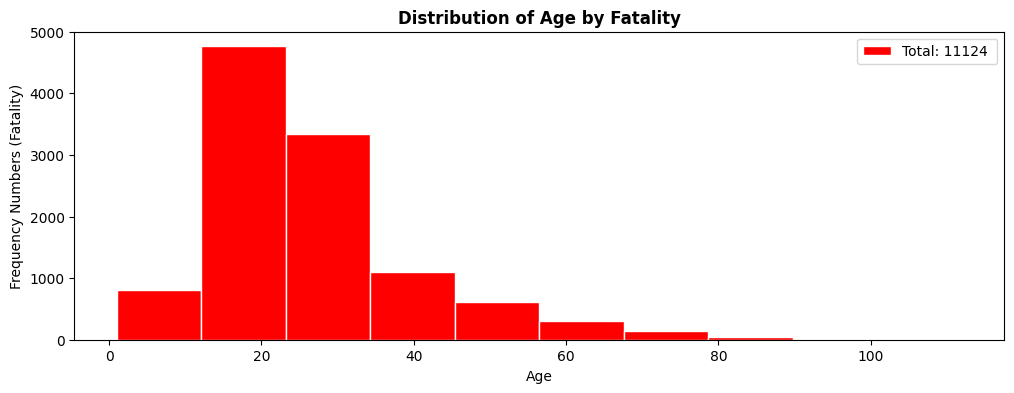

In [43]:
total = int(dfFatalitiesIsraeliPalestinian['age'].count())
plt.figure(figsize=(12, 4))
plt.hist(dfFatalitiesIsraeliPalestinian['age'], bins=10, color='red', edgecolor='white',)
plt.title('Distribution of Age by Fatality', fontweight='bold')
plt.legend([f'Total: {total} '])
plt.xlabel('Age')
plt.ylabel('Frequency Numbers (Fatality)')
plt.show();

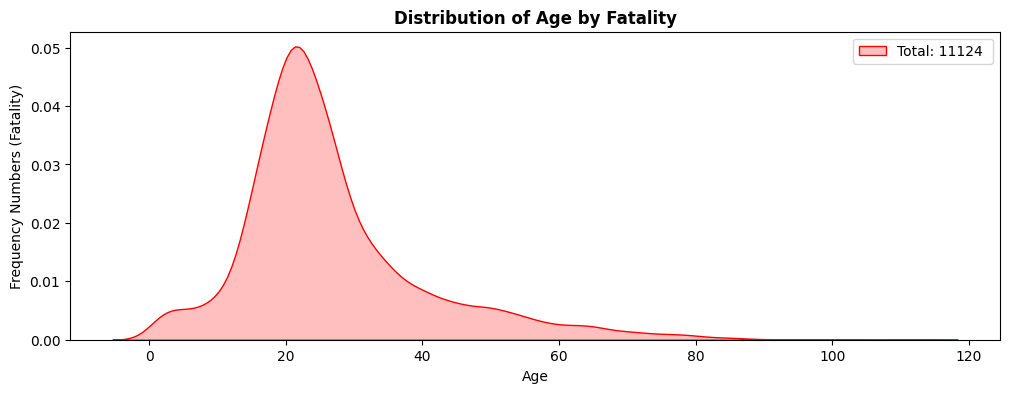

In [44]:
total = int(dfFatalitiesIsraeliPalestinian['age'].count())
plt.figure(figsize=(12, 4))
sns.kdeplot(dfFatalitiesIsraeliPalestinian['age'], fill=True, color='r')
plt.title('Distribution of Age by Fatality', fontweight='bold')
plt.legend([f'Total: {total} '])
plt.xlabel('Age')
plt.ylabel('Frequency Numbers (Fatality)')

plt.show();

**Explaining the figures:**

The graphs above show the distribution by age of individuals killed between Israelis and Palestinians.

We can see that the majority of those killed are young people between the ages of 15 and 30. Young children are also among the fatalities and there is a decline with increasing age.

The data shows that young people and children are the biggest victims of fatalities.

In [45]:
dfFatalitiesIsraeliPalestinian.describe()

,age
count,11124.000000
mean,26.745703
std,13.700404
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


The average age of the dead is 26, and the oldest person was 112 years old. On the other hand, the youngest individual counted among the dead is a baby who was only 1 year old. The standard deviation is 13.

## Day of the event and day of death

In [46]:
dfFatalitiesIsraeliPalestinian.loc[dfFatalitiesIsraeliPalestinian['date_of_event'] != dfFatalitiesIsraeliPalestinian['date_of_death']]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
5,'Ata Yasser 'Ata Musa,2023-09-19,29.000000,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-20,M,Unknown,Jenin,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
20,Muhammad Naser Salem Dawood,2023-08-16,19.000000,Palestinian,Balata R.C.,Nablus,West Bank,2023-08-19,M,Unknown,Balata R.C.,Nablus,gunfire,live ammunition,Israeli security forces,Wounded by Israeli forces during a fire exchan...
24,Amir Ahmad Muhammad Khalifah,2023-08-10,24.000000,Palestinian,Nablus,Nablus,West Bank,2023-08-19,M,Unknown,Ein Beit al-Maa R.C.,Nablus,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces during a fire e...
32,Ramzi Fathi 'Abd a-Rahman Hamed,2023-08-02,17.000000,Palestinian,Ofra,Ramallah and al-Bira,West Bank,2023-08-07,M,Unknown,Silwad,Ramallah and al-Bira,gunfire,live ammunition,Israeli security forces,"Wounded by soldiers’ gunfire when, according t..."
59,'Iz a-Din Mahmoud Khalil Abu 'On,2023-07-03,19.000000,Palestinian,Jenin,Jenin,West Bank,2023-08-25,M,Unknown,Jaba',Jenin,gunfire,live ammunition,Israeli security forces,Wounded by Israeli gunfire while participating...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10965,Taha Ribhi Abu Sneineh,2001-10-07,18.000000,Palestinian,Hebron,Hebron,West Bank,2002-02-12,M,No,Hebron,Hebron,gunfire,Unknown,Israeli security forces,Killed during ongoing IDF operation in the Abu...
11019,David Cohen,2001-07-13,28.000000,Israeli,Kiryat Arba,Hebron,West Bank,2001-07-14,M,Israelis,Beitar Illit,Bethlehem,gunfire,Unknown,Palestinian civilians,Killed when Palestinians opened fire at an IDF...
11031,Yehuda Haim Shoham,2001-06-05,26.745703,Israeli,Shilo Junction,Ramallah and al-Bira,West Bank,2001-06-11,M,Israelis,Shilo,Ramallah and al-Bira,stones throwing,Unknown,Palestinian civilians,"Wounded in the head by a stone thrown at him, ..."
11038,Yael Yulia Sklianik,2001-06-01,15.000000,Israeli,Tel Aviv-Yafo,Israel,Israel,2001-06-03,F,Israelis,Holon,Israel,explosion,bomb,Palestinian civilians,Killed in a suicide bombing at the entrance to...


**Explaining the table:**

We can see that 940 individuals died on different days from the causative events. 

'Ata Yasser 'Ata Musa, aged 29, was the victim of a firearm on 2023-09-19 and died on 2023-09-20. 

Yael Yulia Sklianik, aged just 15, was the victim of an explosion on 2001-06-01 and died on 2001-06-03.

## Distribution of Fatalities per Citizenship

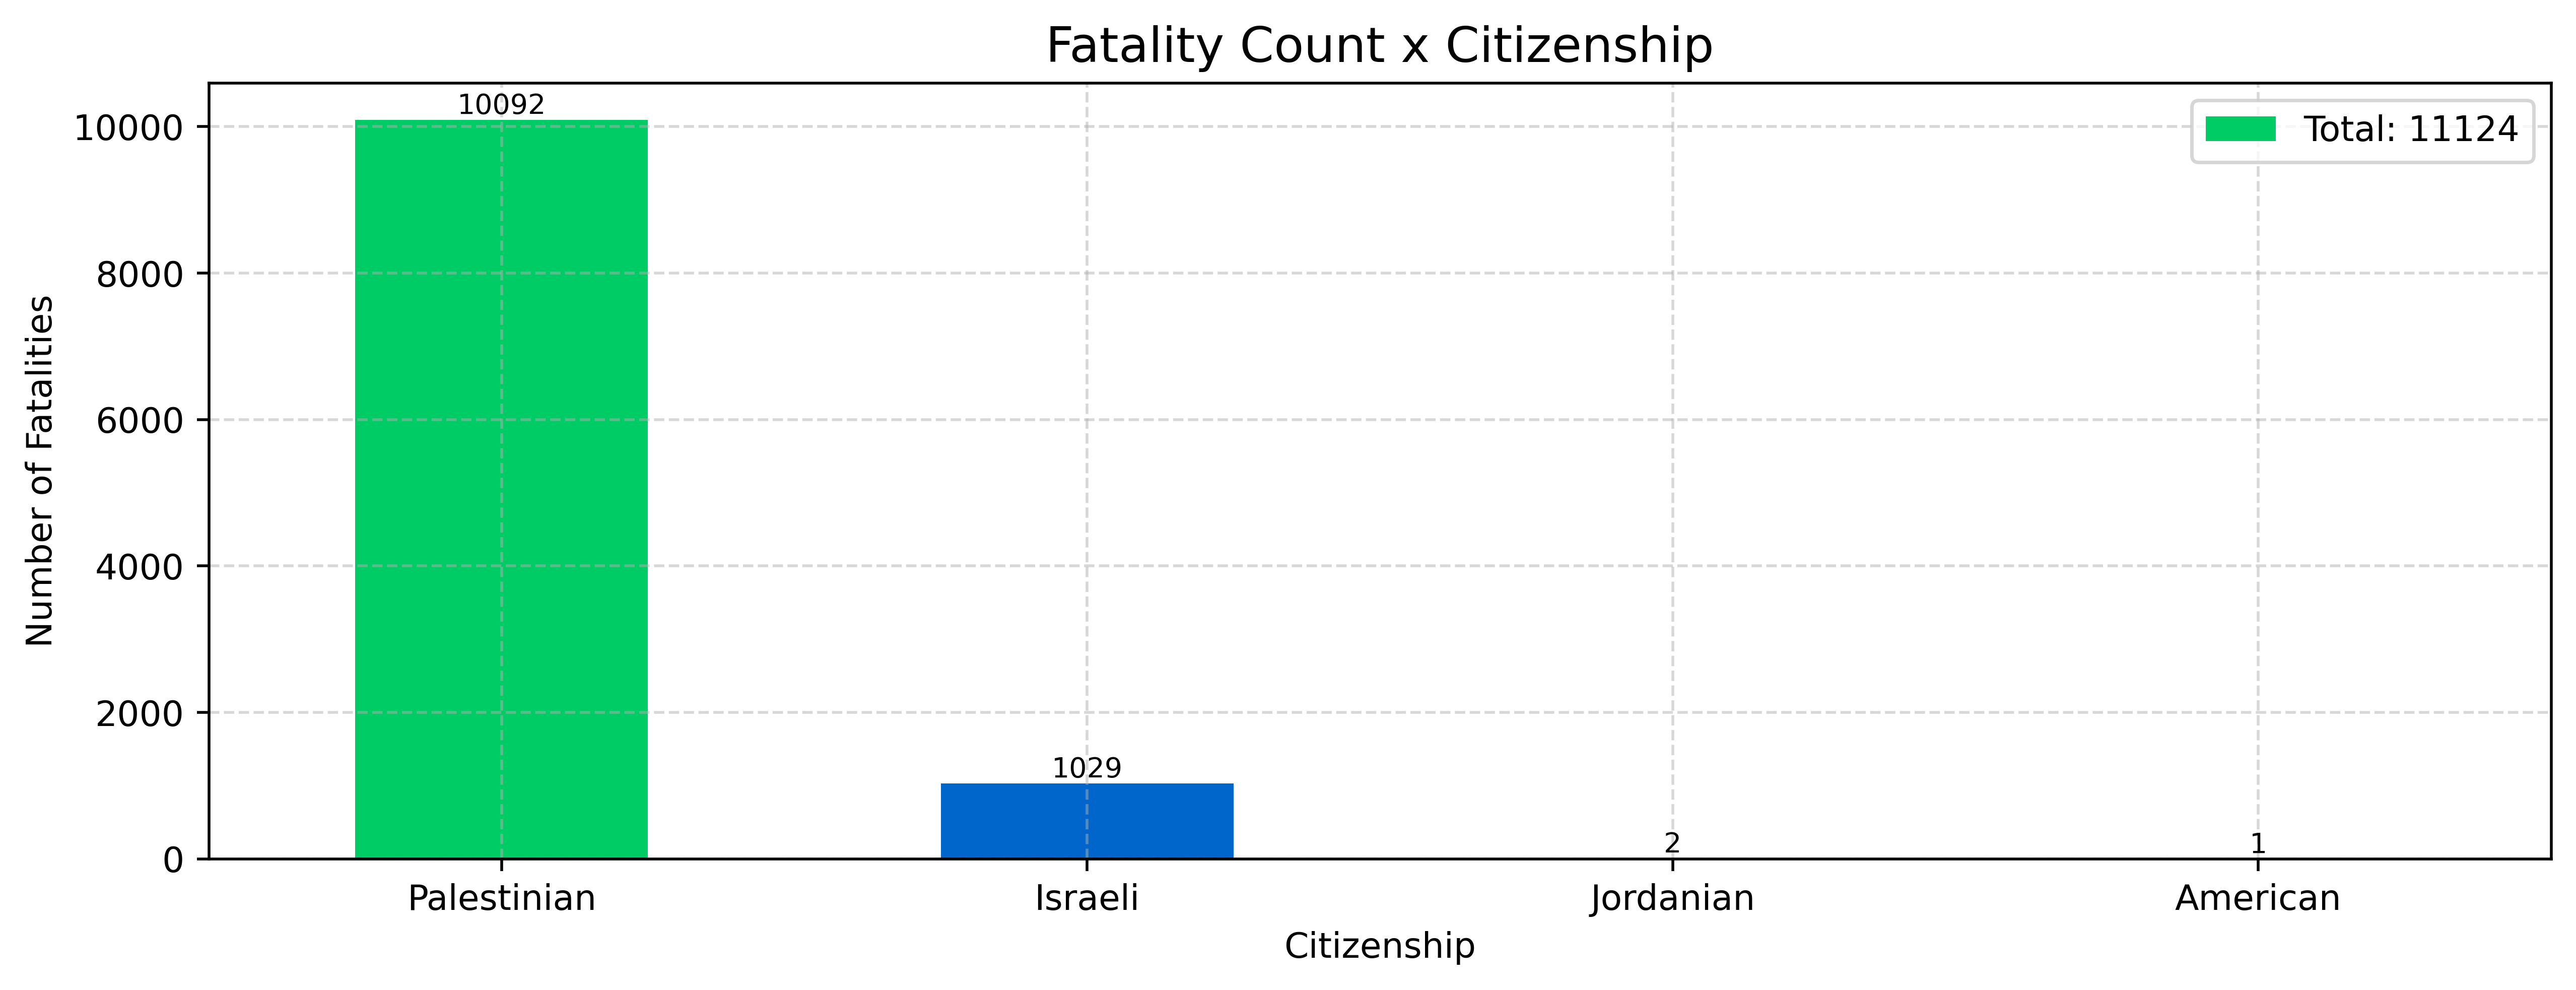

In [47]:
total_death_by_citizenship = dfFatalitiesIsraeliPalestinian['citizenship'].value_counts()

total = dfFatalitiesIsraeliPalestinian['citizenship'].count()

colors = ['#00cc66', '#0066cc']

plt.figure(figsize=(12, 4), dpi=500)

total_death_by_citizenship.plot(kind='bar', color=colors)
plt.title('Fatality Count x Citizenship', fontsize=14)
plt.xlabel('Citizenship')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=0)
plt.legend([f'Total: {total}'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i in range(len(total_death_by_citizenship)):
    plt.text(i, total_death_by_citizenship[i], str(total_death_by_citizenship[i]),\
             ha='center', va='bottom', fontsize=8)
    
plt.show()

**Explaining the graph:**

We can see that the majority of the dead are Palestinians, representing 90% of the total dead.

We can see that Israelis represent 9% of the dead, while there were 2 Jordanian deaths and 1 American death. 

## Distribution of Fatalities per Gender

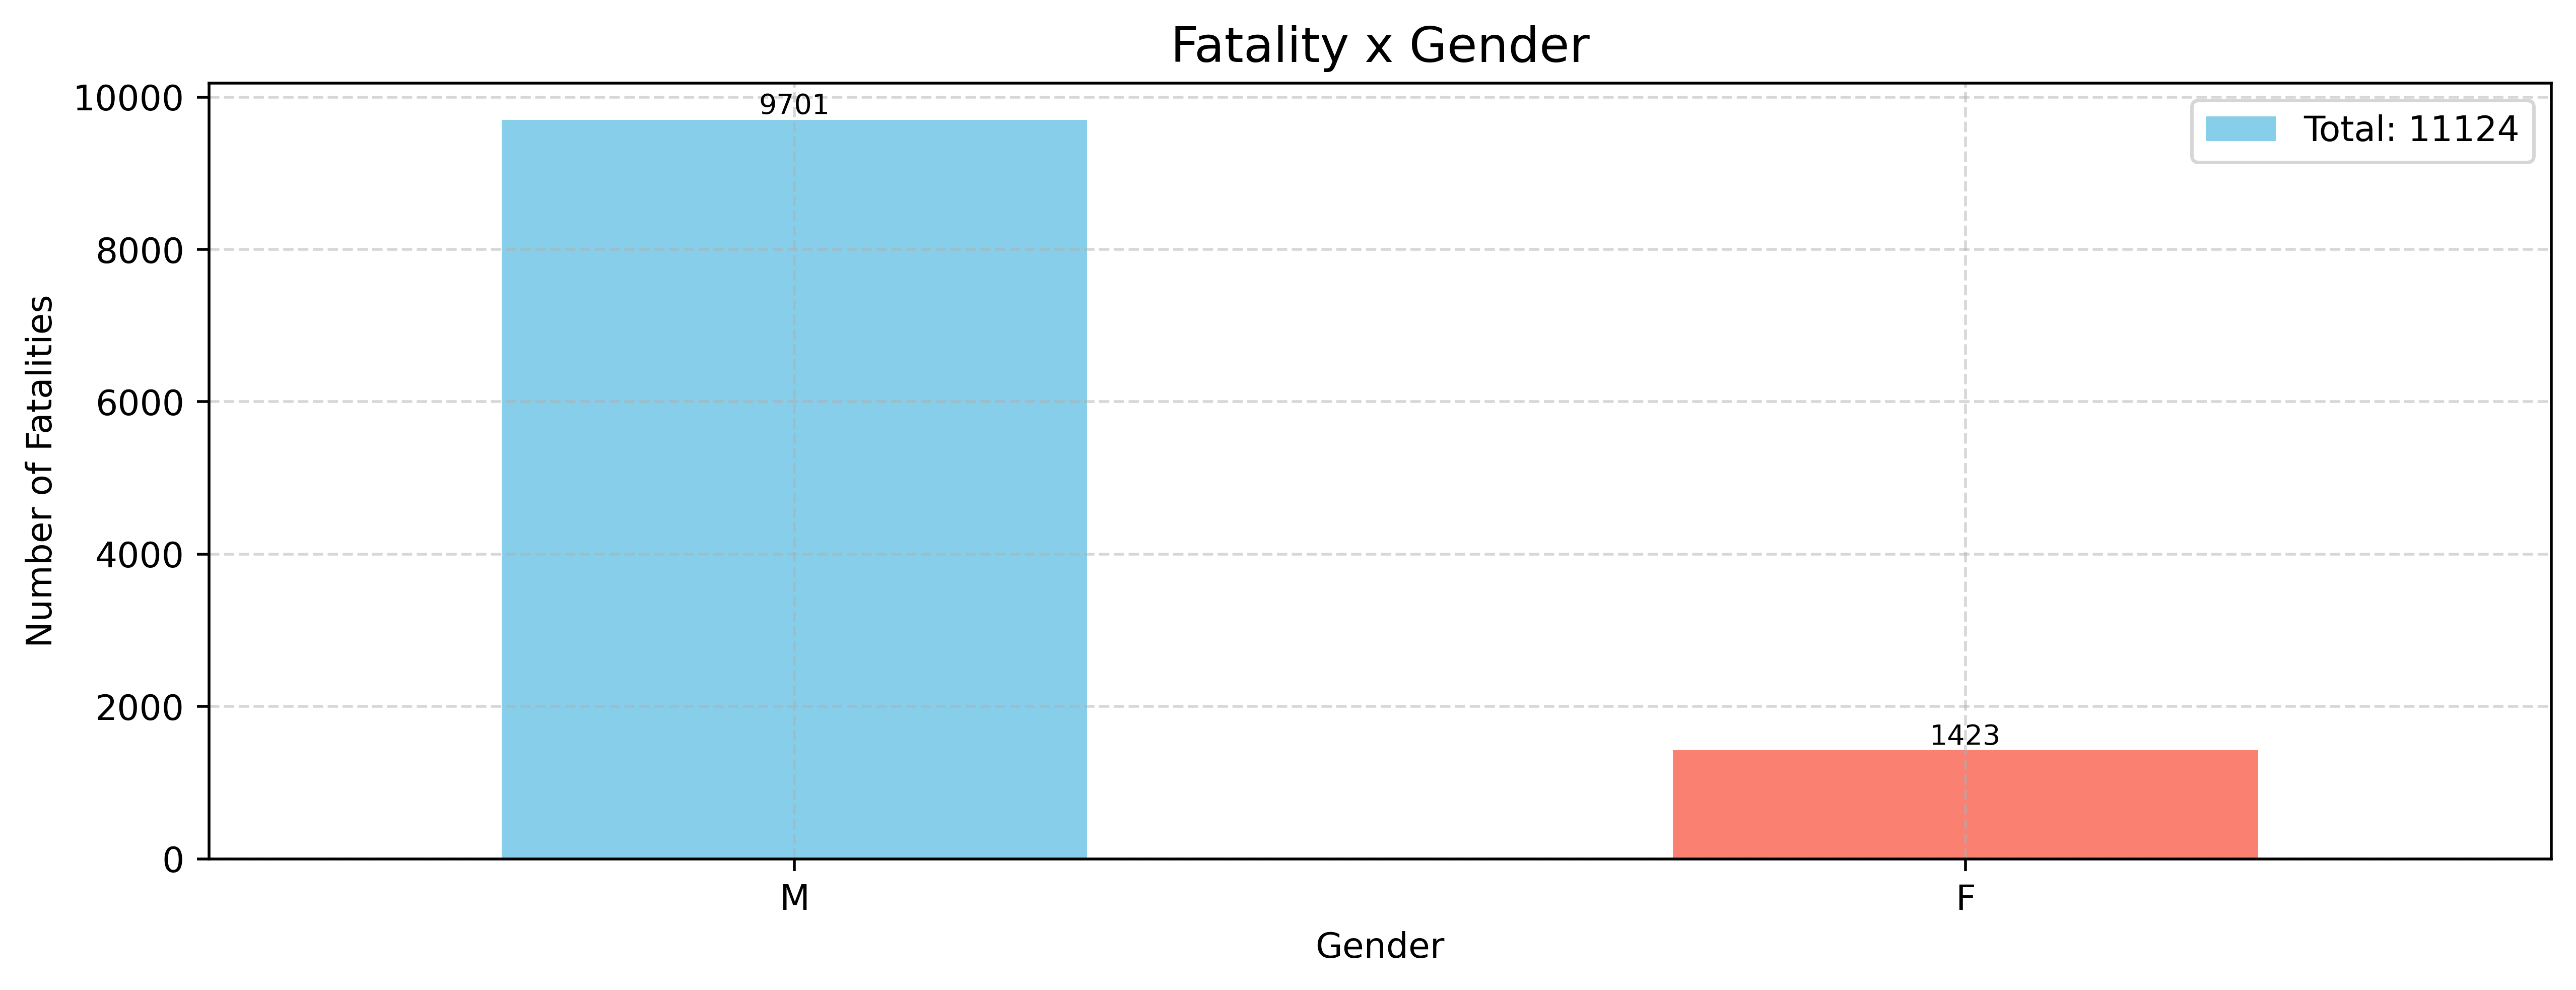

In [48]:
total_death_by_gender = dfFatalitiesIsraeliPalestinian['gender'].value_counts()

total = dfFatalitiesIsraeliPalestinian['gender'].count()

colors = ['skyblue', 'salmon']

plt.figure(figsize=(12, 4), dpi=500)

total_death_by_gender.plot(kind='bar', color=colors)
plt.title('Fatality x Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=0)
plt.legend([f'Total: {total}'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i in range(len(total_death_by_gender)):
    plt.text(i, total_death_by_gender[i], str(total_death_by_gender[i]),\
             ha='center', va='bottom', fontsize=8)
    
plt.show()

**Explaining the graph:**

As we can see, the total number of fatalities is 11124, of which 9701 are male and 1423 female. 

87.20% of those killed are men of all ages, while 12.80% are women. 

# Distribution of Fatalities per Region

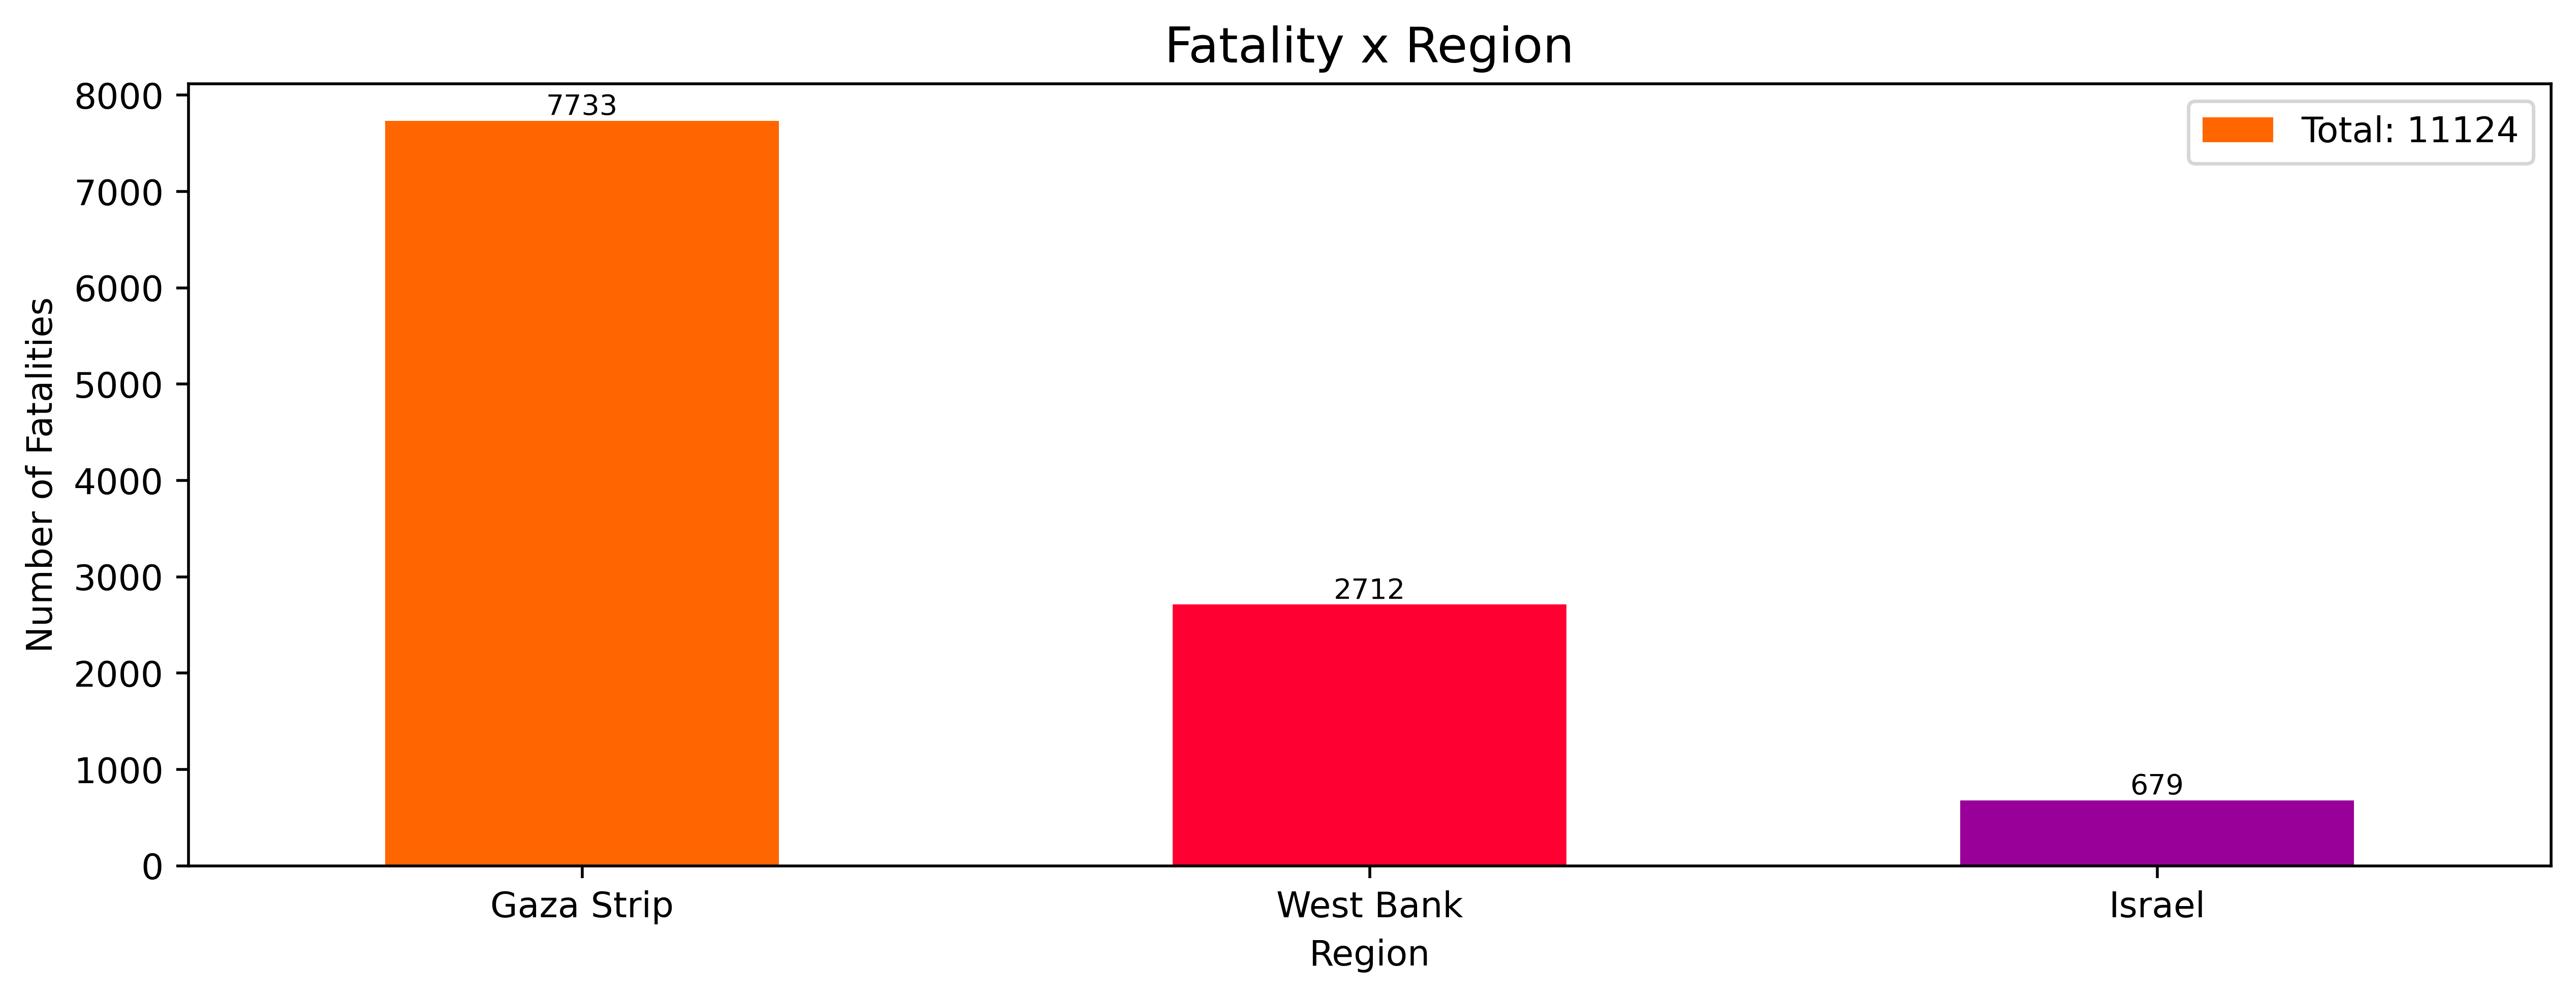

In [49]:
total_death_by_region = dfFatalitiesIsraeliPalestinian['event_location_region'].value_counts()

total = dfFatalitiesIsraeliPalestinian['event_location_region'].count()

colors = ['#ff6600', '#ff0033', '#990099']

plt.figure(figsize=(12, 4), dpi=500)

total_death_by_region.plot(kind='bar', color=colors)
plt.title('Fatality x Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Number of Fatalities')
plt.xticks(fontsize=10, rotation=0)
plt.legend([f'Total: {total}'])

for i in range(len(total_death_by_region)):
    plt.text(i, total_death_by_region[i], str(total_death_by_region[i]),\
             ha='center', va='bottom', fontsize=8)
    
plt.show()

**Explaining the graph:**

We can see that most of the dead are concentrated in the Gaza Strip region with 69%, followed by the West Bank with 24% and Israel with 6%.

# Distribution of Fatalities per District

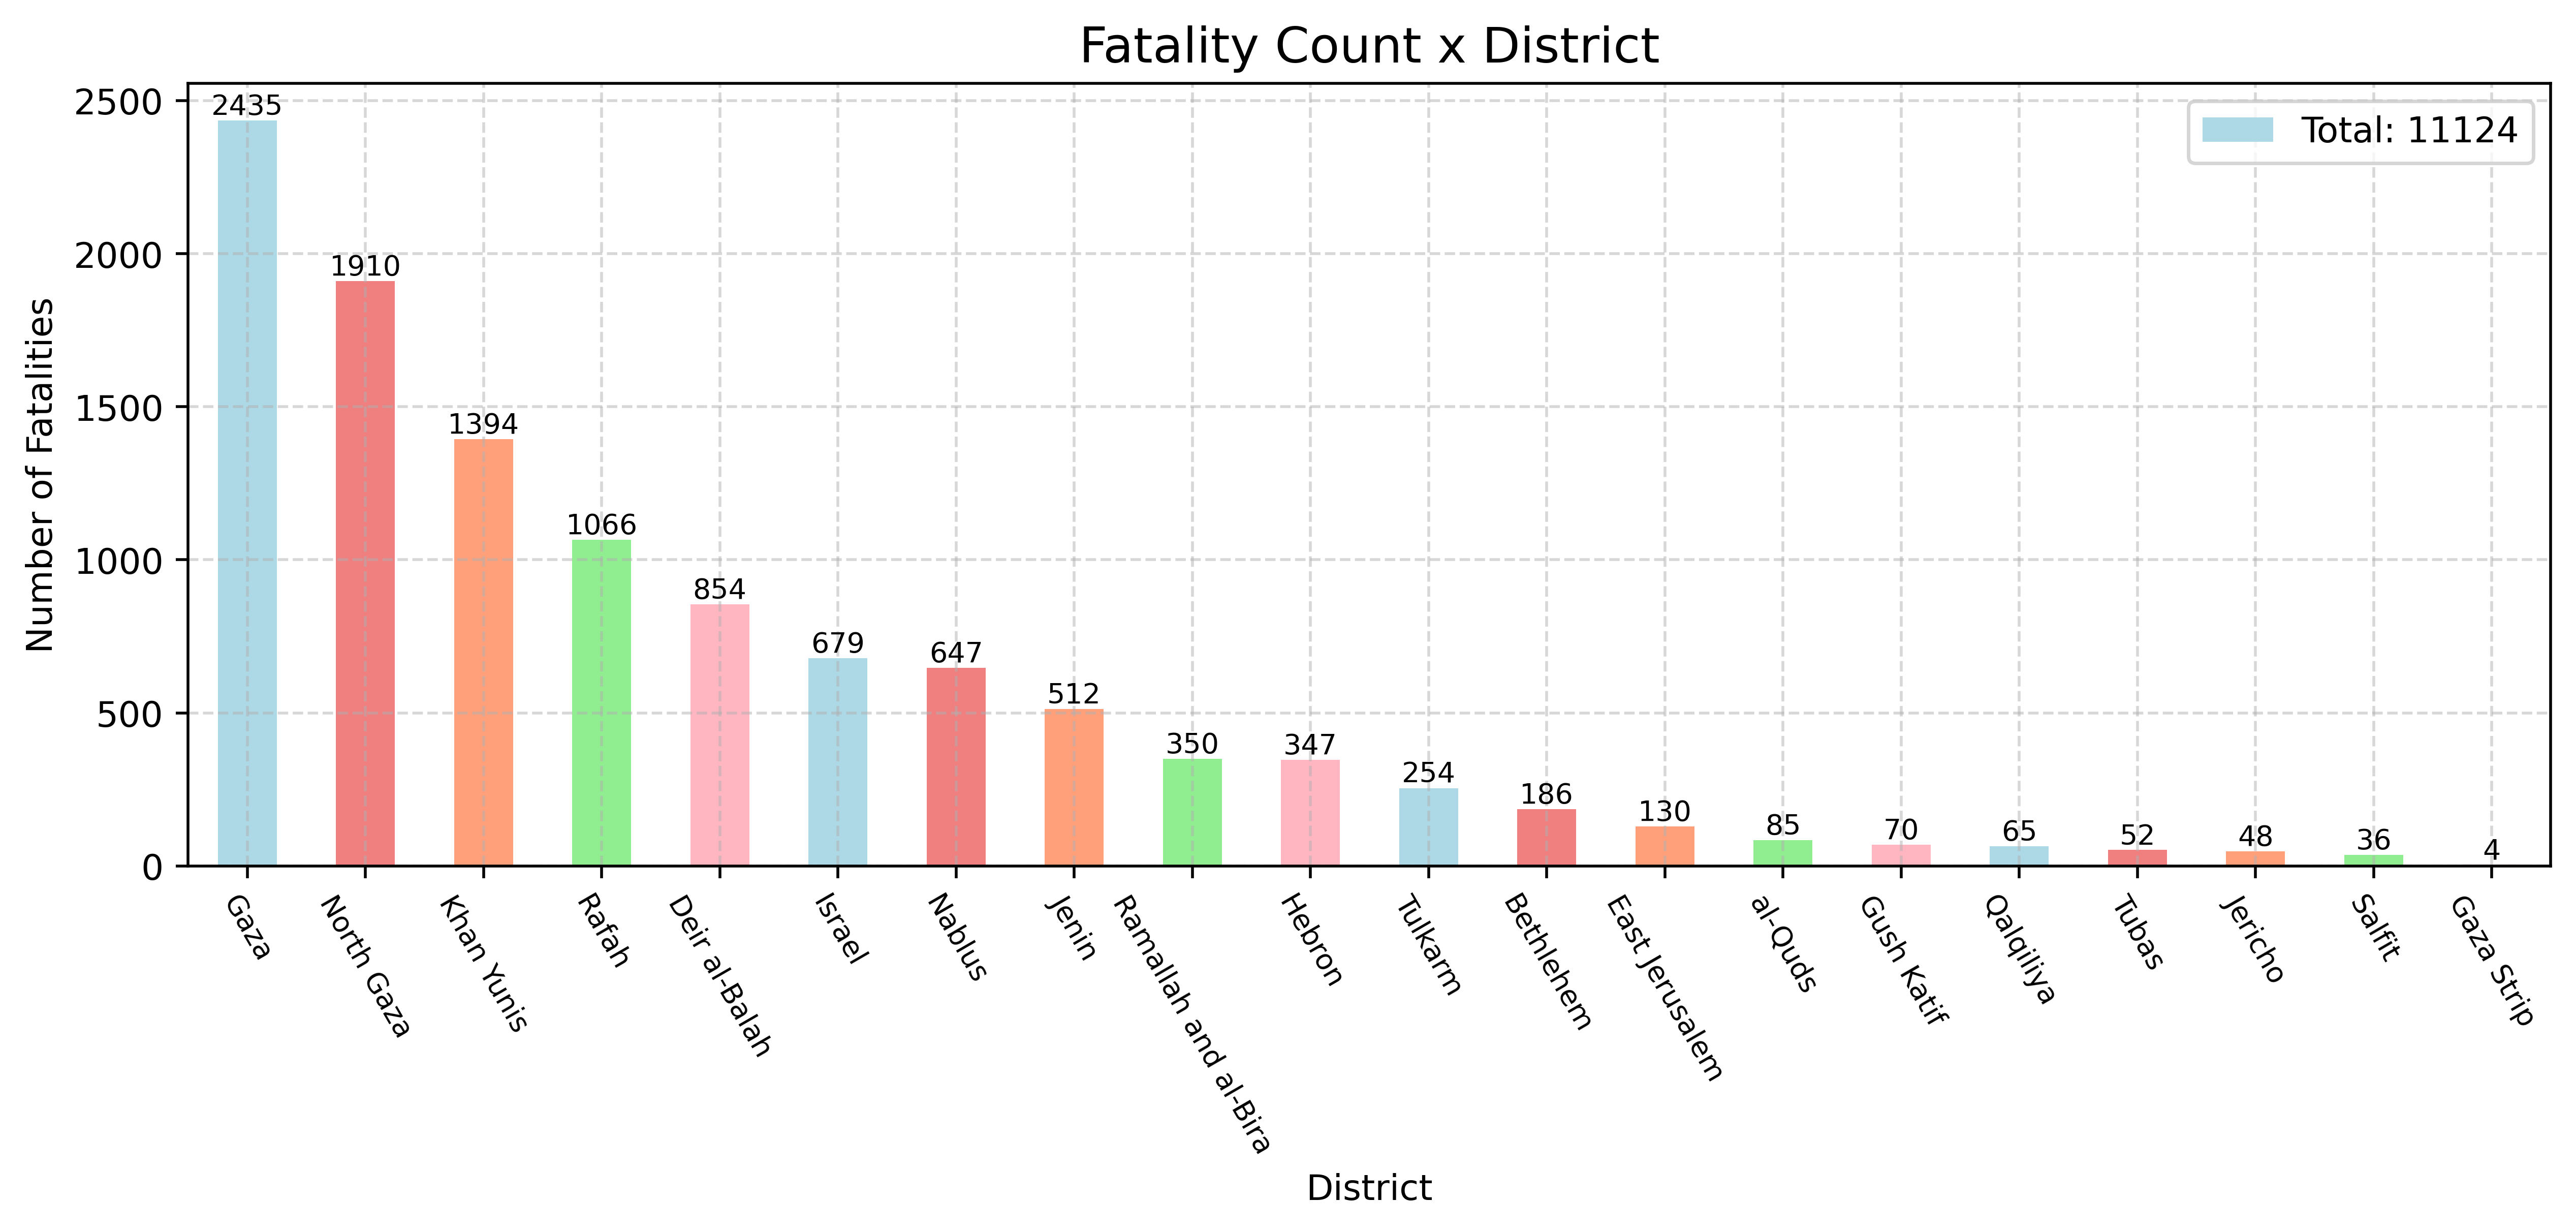

In [50]:
total_death_by_district = dfFatalitiesIsraeliPalestinian['event_location_district'].value_counts()

total = dfFatalitiesIsraeliPalestinian['event_location_district'].count()

colors = ['lightblue', 'lightcoral', 'lightsalmon', 'lightgreen', 'lightpink']

plt.figure(figsize=(12, 4), dpi=500)

total_death_by_district.plot(kind='bar', color=colors)
plt.title('Fatality Count x District', fontsize=14)
plt.xlabel('District')
plt.ylabel('Number of Fatalities')
plt.xticks(fontsize=8, ha='center', rotation=300)
plt.legend([f'Total: {total}'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i in range(len(total_death_by_district)):
    plt.text(i, total_death_by_district[i], str(total_death_by_district[i]),\
             ha='center', va='bottom', fontsize=8)
    
plt.show()

**Explaining the graph:**

The graph shows that 2435 of the fatalities occurred in Gaza with the highest number of fatalities per district, representing 21.89% of the deaths. 

In second place is the North Gaza district with 1910 deaths recorded, representing 17.17% of the total.

The Gaza and North Gaza districts together account for 39% of the total deaths per district.

The lowest recorded rate is the Gaza Strip district, with only 4 deaths.

# Participation in The Hostilities

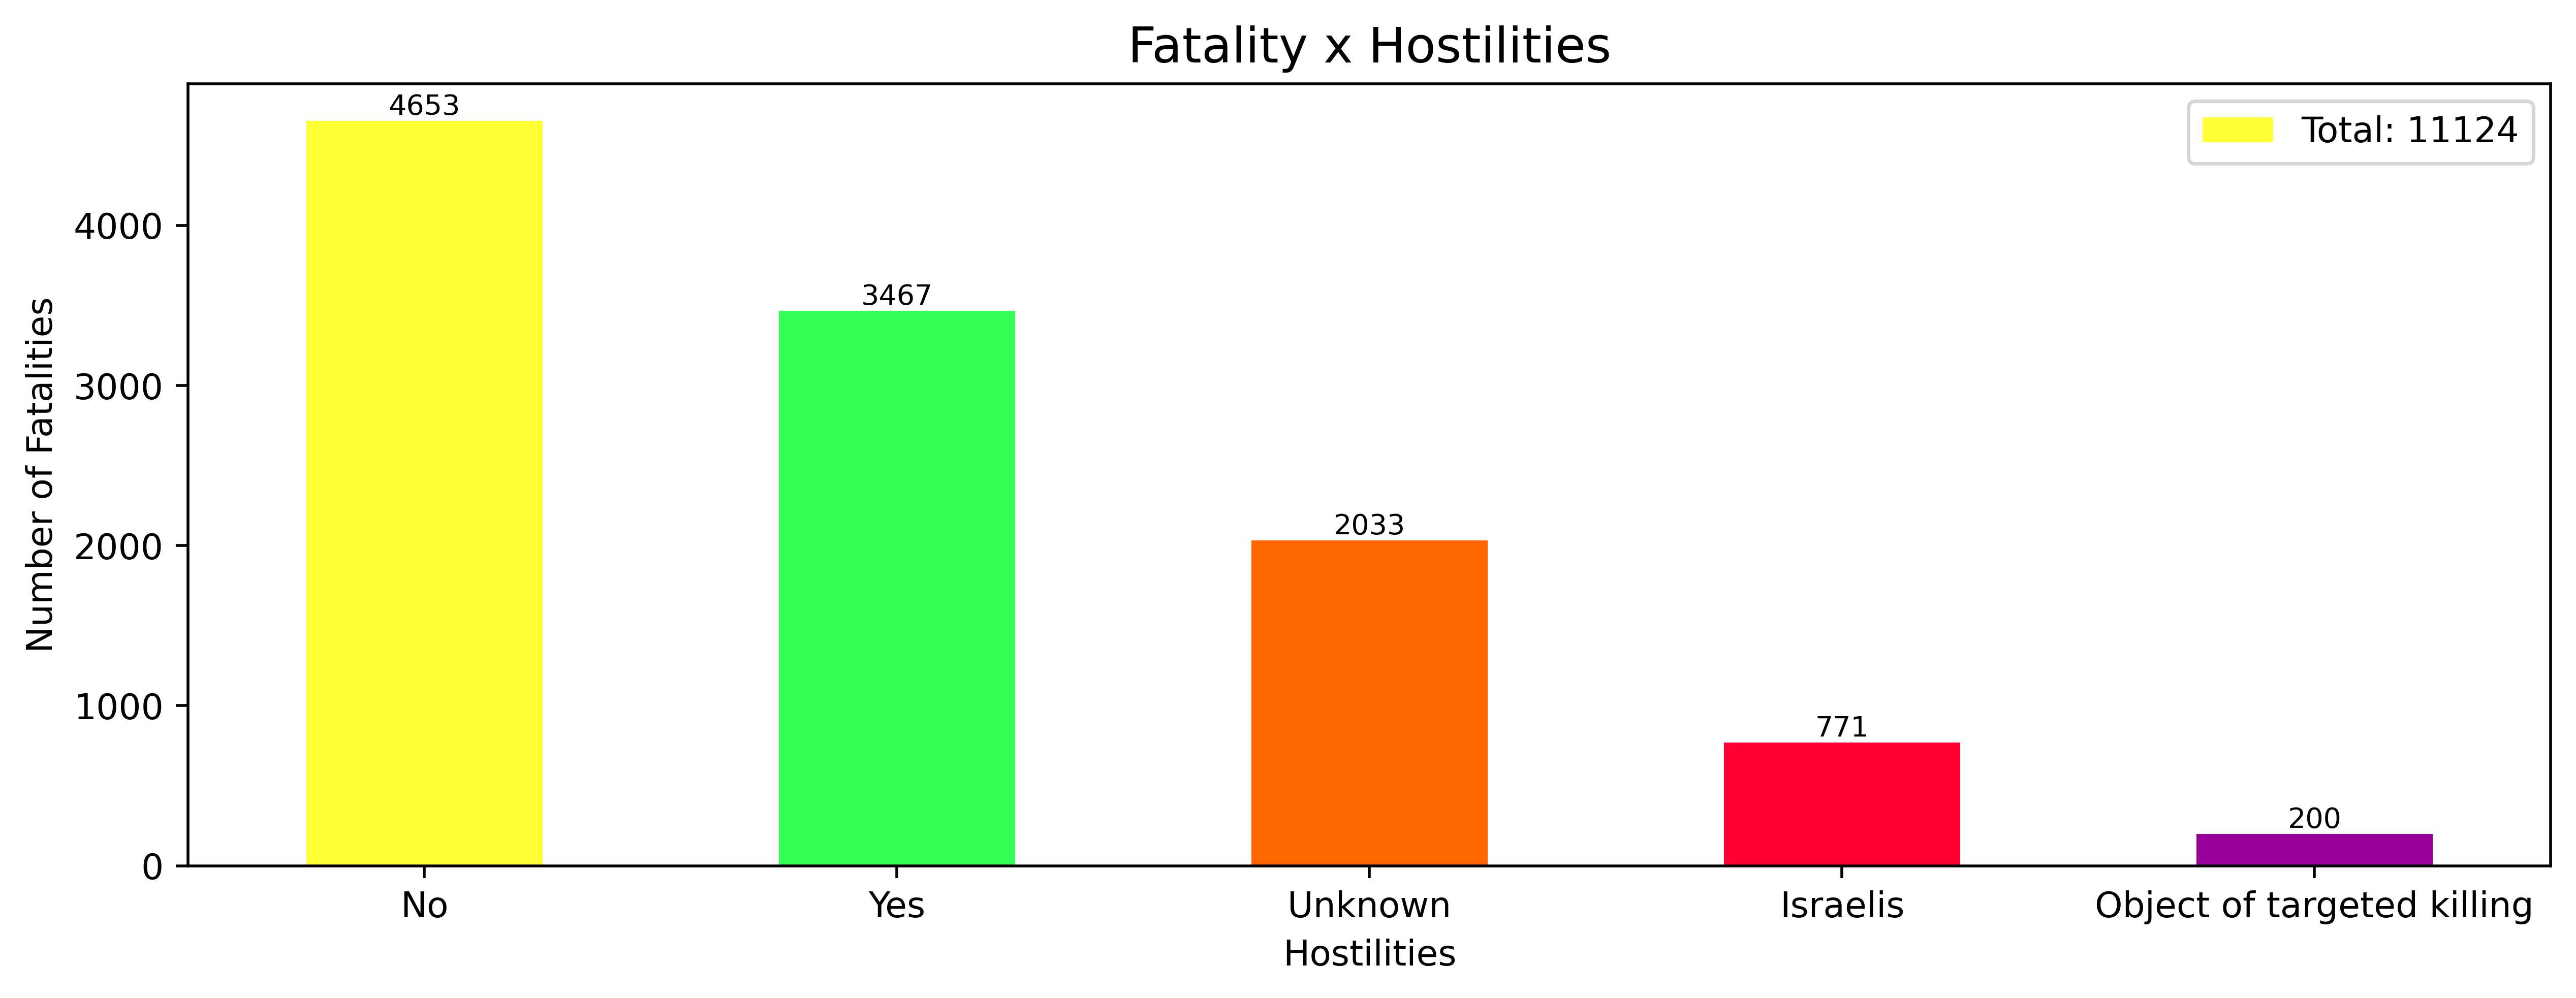

In [51]:
total_death_by_hostilities = dfFatalitiesIsraeliPalestinian['took_part_in_the_hostilities'].value_counts()

total = dfFatalitiesIsraeliPalestinian['took_part_in_the_hostilities'].count()

colors = ['#FFFF33', '#33FF57', '#ff6600', '#ff0033', '#990099']

plt.figure(figsize=(12, 4), dpi=500)

total_death_by_hostilities.plot(kind='bar', color=colors)
plt.title('Fatality x Hostilities', fontsize=14)
plt.xlabel('Hostilities')
plt.ylabel('Number of Fatalities')
plt.xticks(fontsize=10, rotation=0)
plt.legend([f'Total: {total}'])

for i in range(len(total_death_by_hostilities)):
    plt.text(i, total_death_by_hostilities[i], str(total_death_by_hostilities[i]),\
             ha='center', va='bottom', fontsize=8)
    
plt.show()

**Explaining the graph:**

The graph shows that the majority of the dead had no participation in the hostilities, accounting for 41.83 per cent of the total dead. 

Next, we can see that 31.16 per cent of the dead took part in the hostilities.

18.27 per cent are not known, 7 per cent were killed by the Israelis, while 1.8 per cent of the dead were targeted.


# Cause of Death

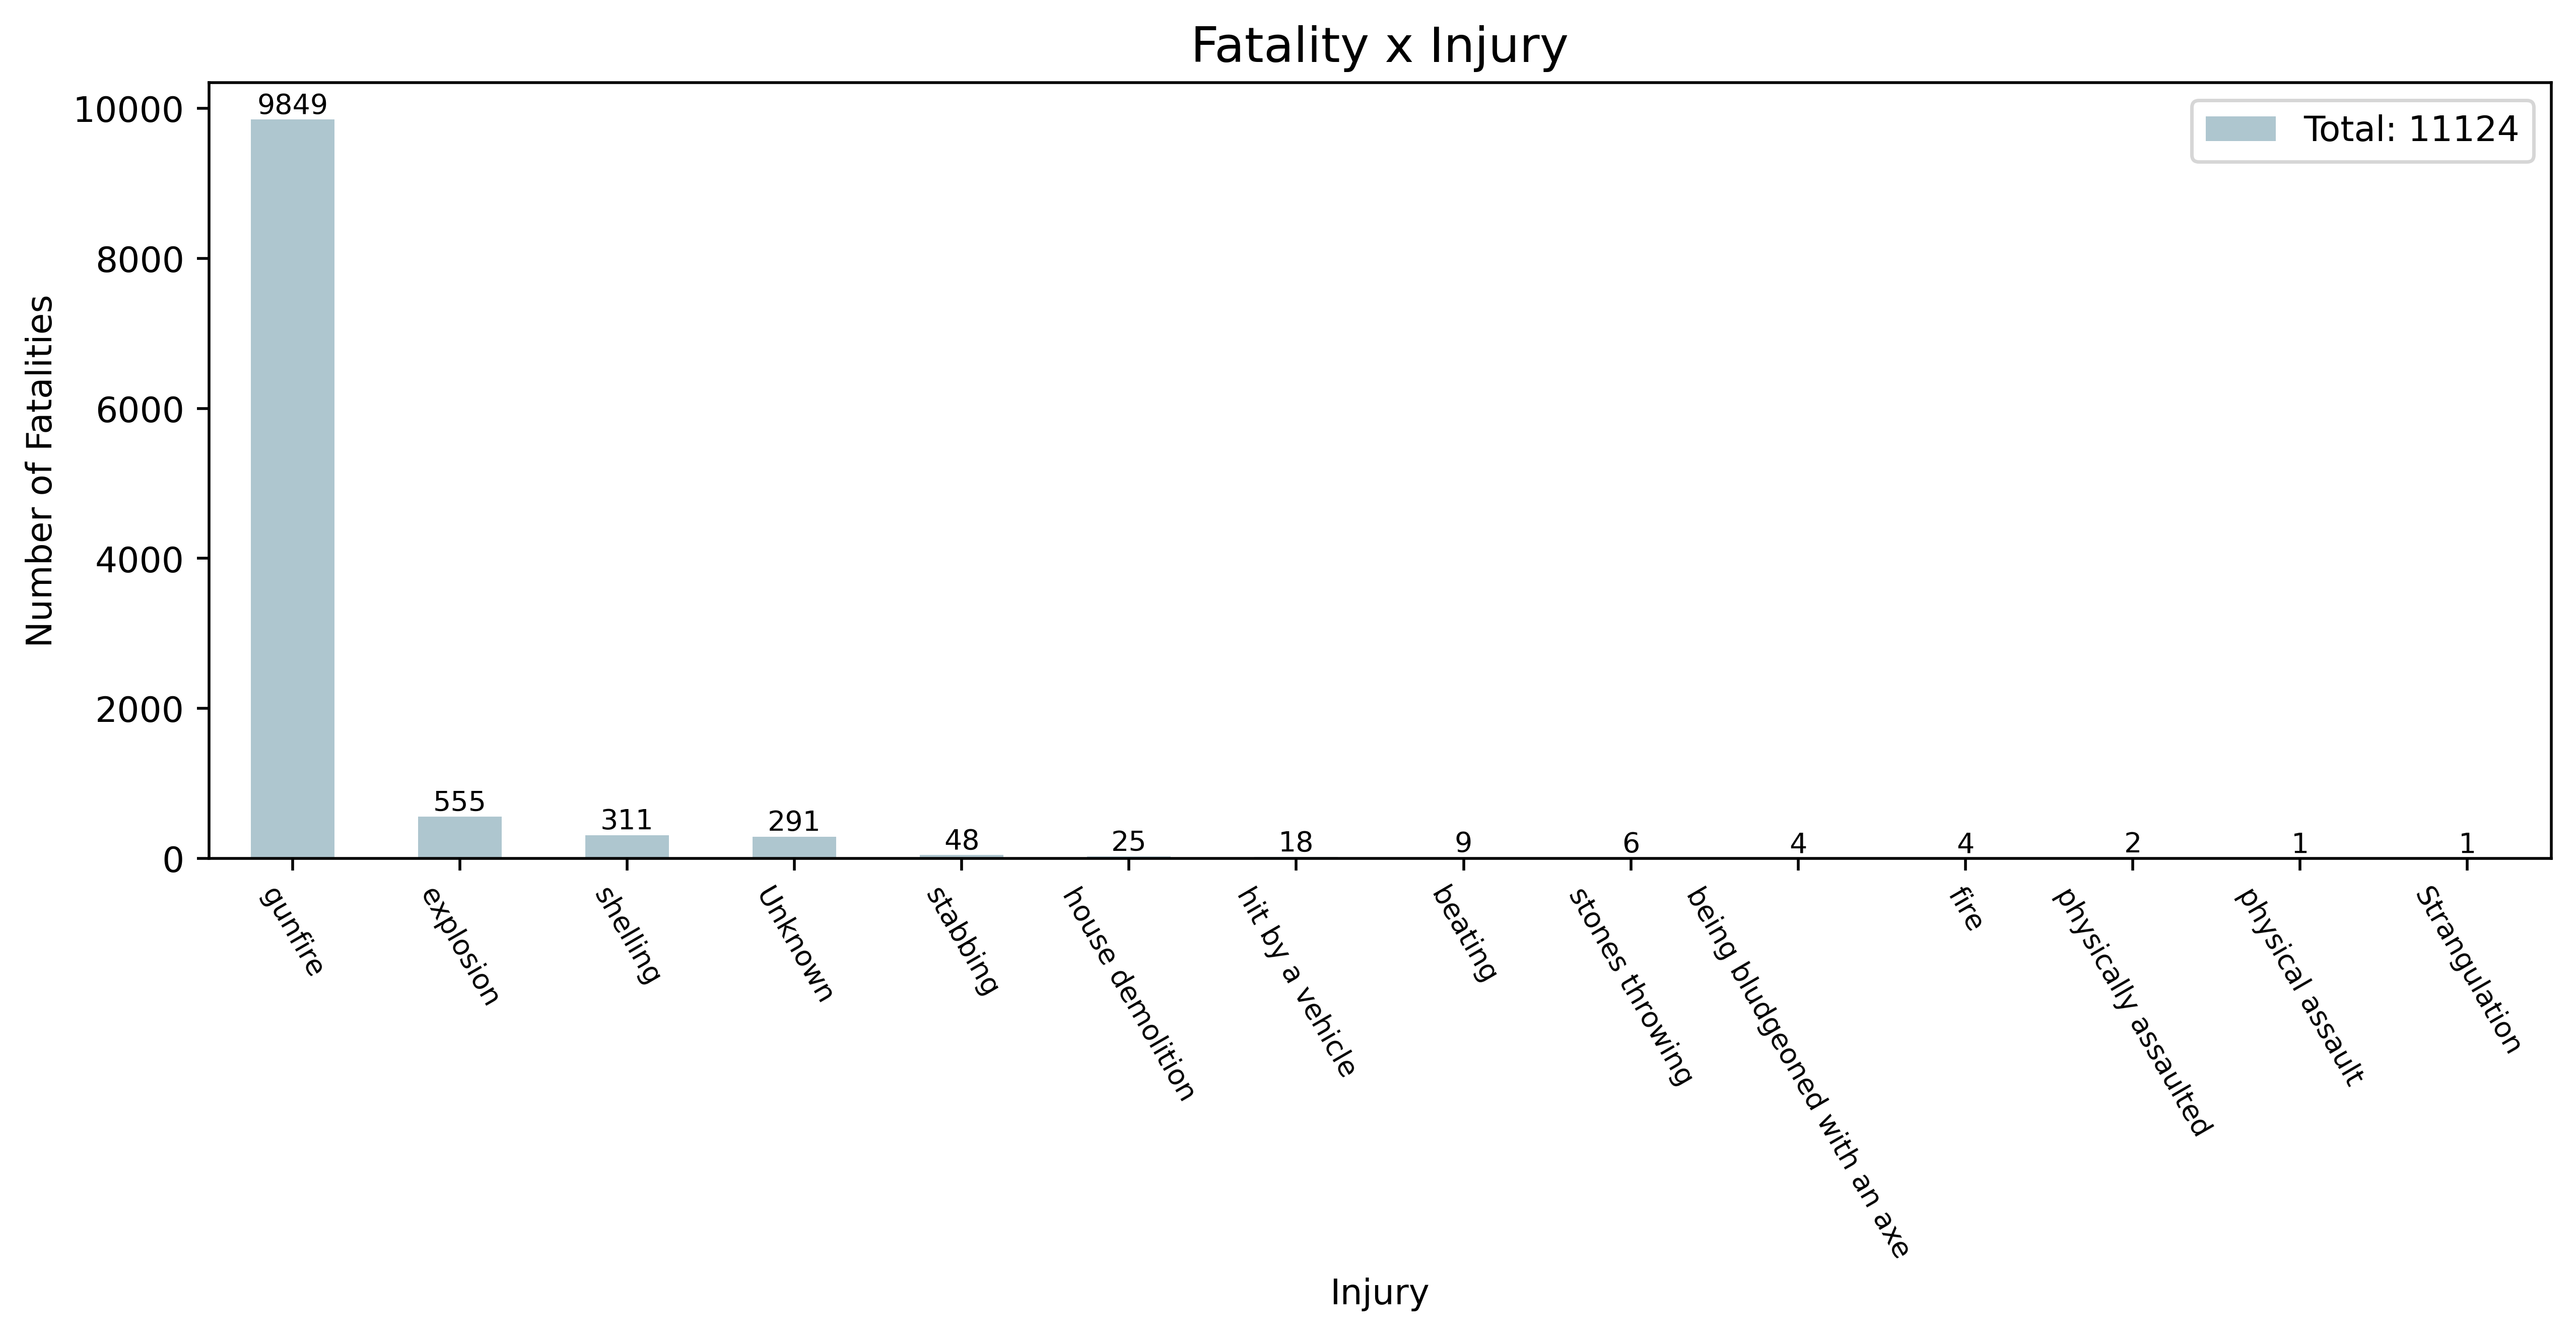

In [52]:
total_death_by_injury = dfFatalitiesIsraeliPalestinian['type_of_injury'].value_counts()

total = dfFatalitiesIsraeliPalestinian['type_of_injury'].count()

colors = ["#AEC6CF"]

plt.figure(figsize=(12, 4), dpi=500)

total_death_by_injury.plot(kind='bar', color=colors)
plt.title('Fatality x Injury', fontsize=14)
plt.xlabel('Injury')
plt.ylabel('Number of Fatalities')
plt.xticks(fontsize=8, ha='center', rotation=300)
plt.legend([f'Total: {total}'])

for i in range(len(total_death_by_injury)):
    plt.text(i, total_death_by_injury[i], str(total_death_by_injury[i]),\
             ha='center', va='bottom', fontsize=8)
  
plt.show()

**Explaining the graph:**


The graph shows that 88 per cent of deaths were by firearm.

We can also see deaths by explosion account for 5% of the total deaths recorded, and there was one death recorded by strangulation.

# Killed by

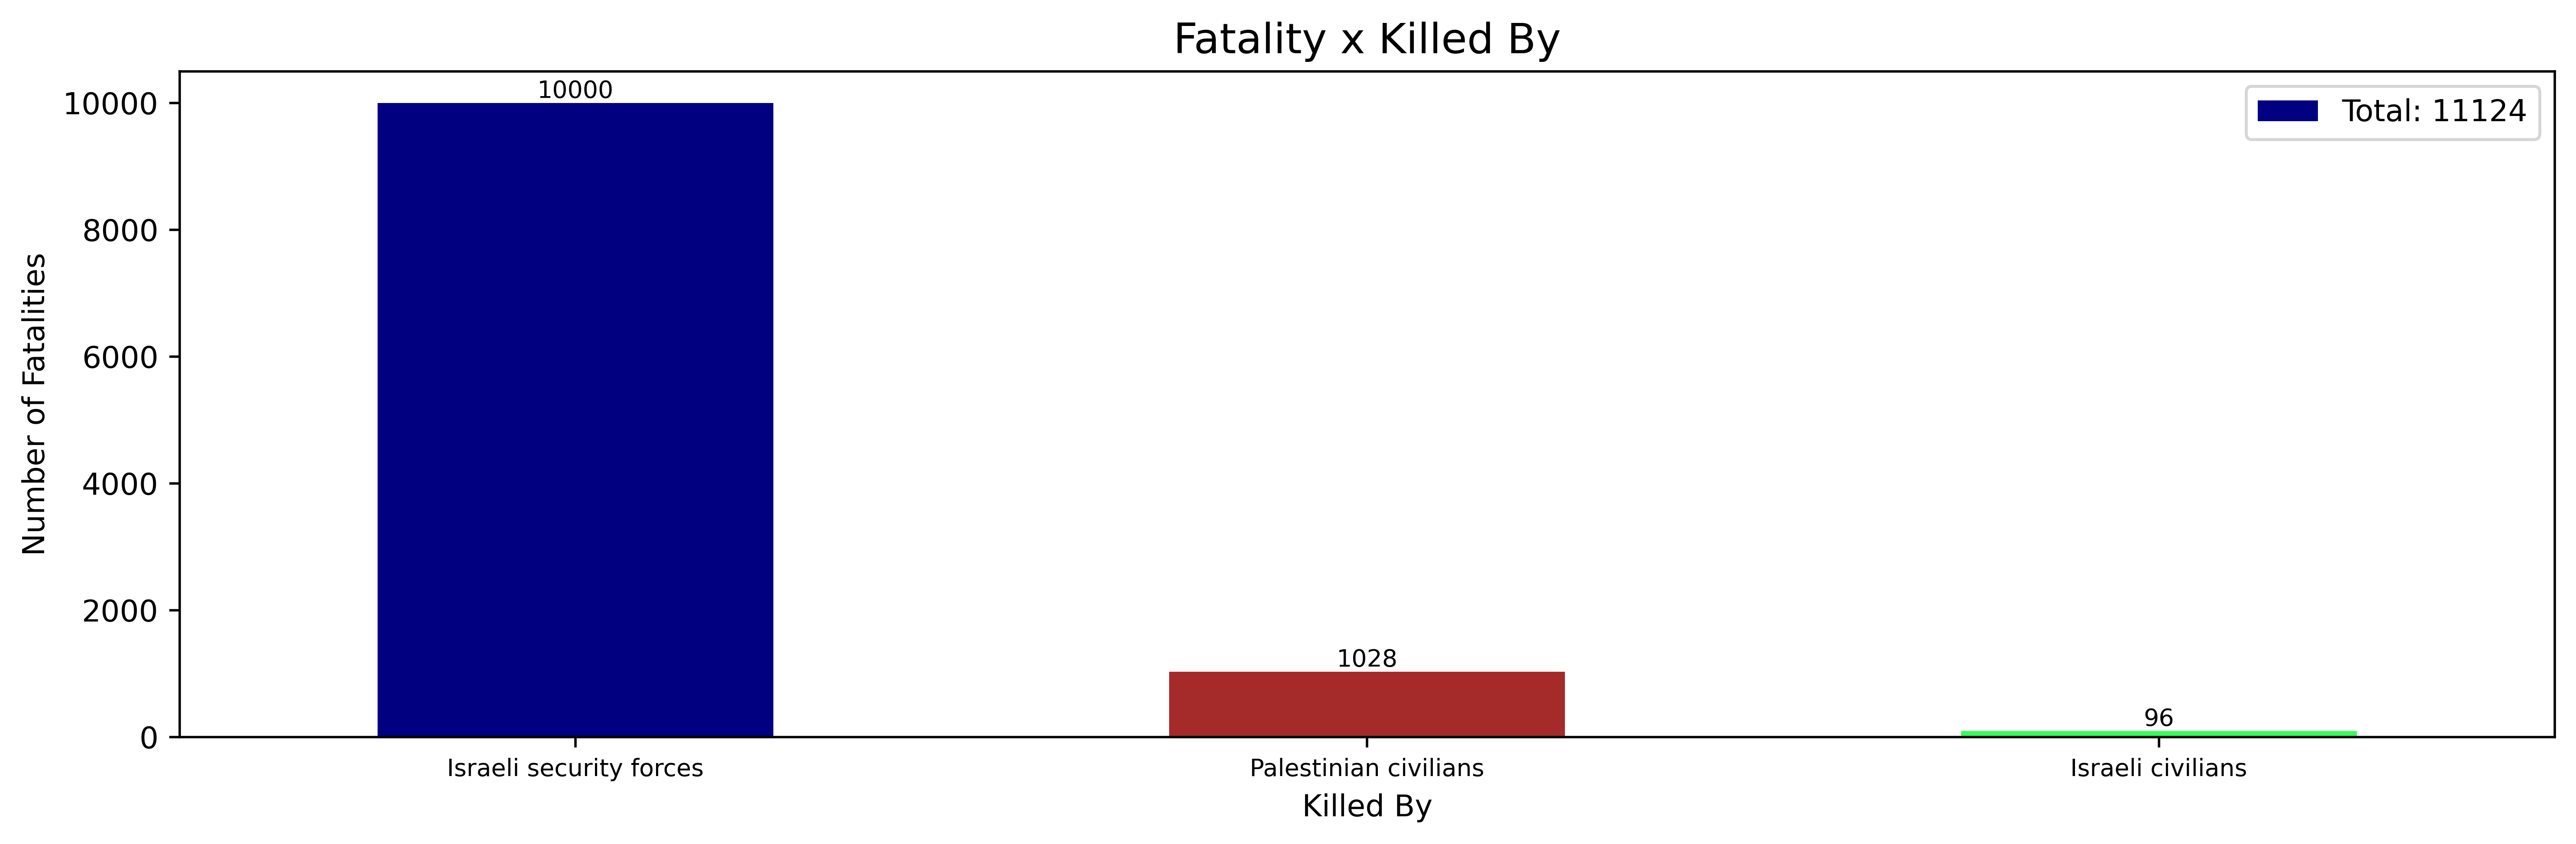

In [53]:
total_death_by_killed = dfFatalitiesIsraeliPalestinian['killed_by'].value_counts()

total = dfFatalitiesIsraeliPalestinian['killed_by'].count()

colors = ["#000080", '#A52A2A', '#33FF57']

plt.figure(figsize=(12, 4), dpi=500)

total_death_by_killed.plot(kind='bar', color=colors)
plt.title('Fatality x Killed By', fontsize=14)
plt.xlabel('Killed By')
plt.ylabel('Number of Fatalities')
plt.xticks(fontsize=8, ha='center', rotation=0)
plt.legend([f'Total: {total}'])



for i in range(len(total_death_by_killed)):
    plt.text(i, total_death_by_killed[i], str(total_death_by_killed[i]),\
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Explaining the graph:**

We can see that the majority of deaths were caused by Israeli forces, representing 89.9 per cent of deaths, and then we see that 9.2 per cent of deaths were caused by Palestinian civilians, 0.8 per cent were caused by Israeli civilians.

# Cumulative Fatalities over the Years

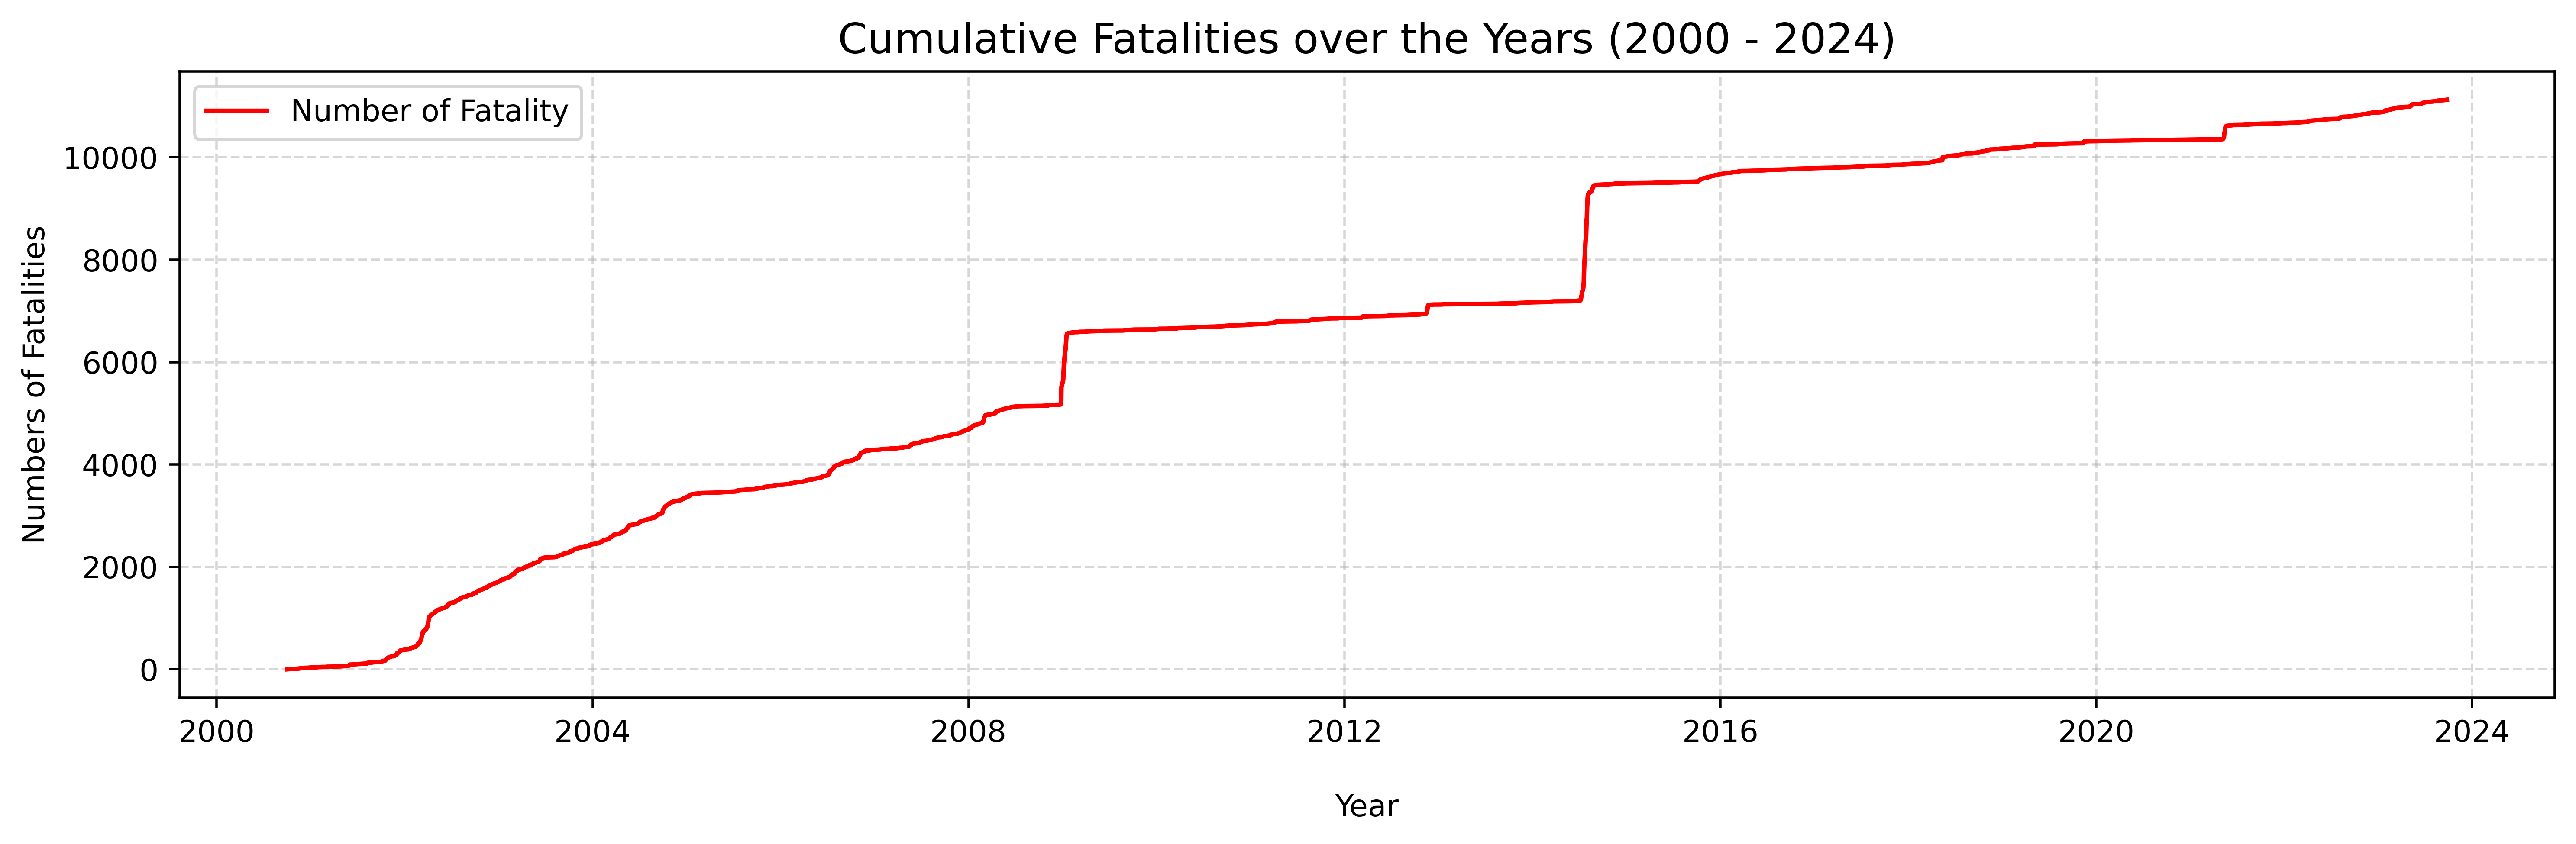

In [54]:
dfFatalitiesIsraeliPalestinian['date_of_death'] = pd.to_datetime(dfFatalitiesIsraeliPalestinian['date_of_death'], format='%Y-%m-%d')
dfFatalitiesIsraeliPalestinian = dfFatalitiesIsraeliPalestinian.sort_values(by='date_of_death')

total_by_date = dfFatalitiesIsraeliPalestinian.groupby('date_of_death').size().cumsum()

plt.figure(figsize=(12, 4), dpi=500)

plt.plot(
    total_by_date.index, total_by_date.values, 
    linestyle='-', 
    color='r', 
    label='Number of Fatality'
)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks()
plt.xlabel('\nYear', fontsize=10)
plt.ylabel('Numbers of Fatalities', fontsize=10)
plt.title('Cumulative Fatalities over the Years (2000 - 2024)', fontsize=14) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Explaining the graph:**

The graph shows that the accumulation of deaths over the years. 

From 2000 to the present day, the number of fatalities has exceeded 11,000.

 

# Fatality Frequency over the Years

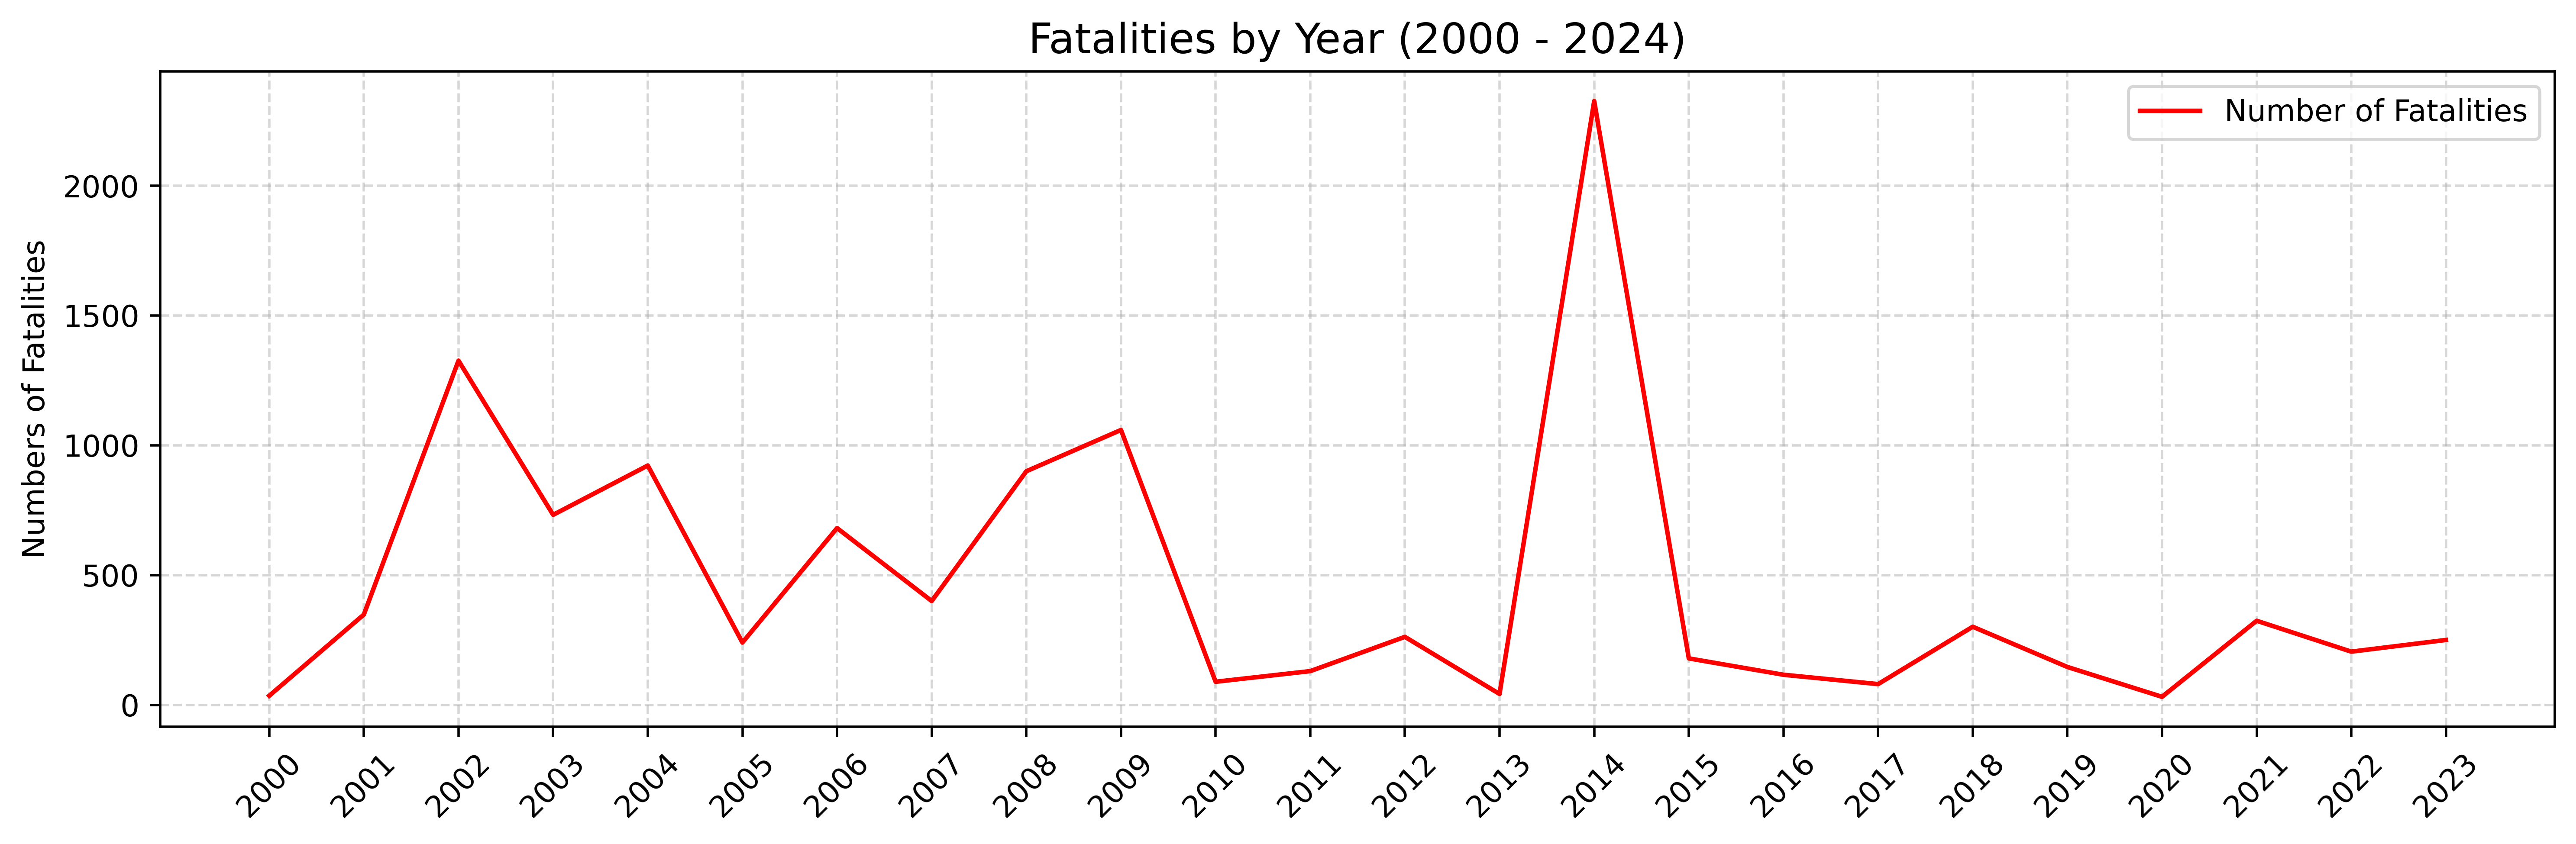

In [55]:
dfFatalitiesIsraeliPalestinian['date_of_death'] = pd.to_datetime(
    dfFatalitiesIsraeliPalestinian['date_of_death'], format='%Y-%m-%d')

fatalities_by_year = dfFatalitiesIsraeliPalestinian['date_of_death'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 4), dpi=500)
plt.plot(
    fatalities_by_year.index, fatalities_by_year.values, 
    linestyle='-', 
    color='r', 
    label='Number of Fatalities'
)

plt.xticks(fatalities_by_year.index, rotation=45)
plt.ylabel('Numbers of Fatalities', fontsize=10)
plt.title('Fatalities by Year (2000 - 2024)', fontsize=14) 

plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

**Explaining the graph:**

The graph shows the evolution of the frequency of deaths over the years.

It is clear that 2014 recorded the highest peak in fatalities, followed by the second highest peak in 2002.

Between 2002 and 2014, we noticed a pattern of oscillation in the frequency of fatalities, with significant variations from one year to the next.

From 2015 until the current period, the number of fatalities shows stability, indicating a period in which variations in the frequency of deaths are smaller and remain at more constant levels.

# **Conclusion:**

After a thorough analysis of the data, we identified that the most significant incidence of fatalities is associated with young people aged between 15 and 30, although children and the elderly were also significantly affected. In addition, we observed that the majority of victims are male, representing 87.20 per cent of all deaths, while women comprise 12.80 per cent of the fatalities recorded.

Another relevant fact is that the majority of deaths occurred among the Palestinian population, accounting for 90% of total deaths, while the Israeli population accounted for 9% of deaths, and 1% of fatalities involved other nationalities.

The concentration of incidents stands out in the Gaza Strip region, followed by the West Bank and Israel. The Gaza district is the most affected and registers the highest number of incidents, followed by North Gaza in second place. It is important to emphasise that most of the victims were not involved in hostilities, showing that most of the dead were people not directly involved in clashes.

The main cause of death recorded was the use of firearms, accounting for 88 per cent of all fatalities. In terms of authorship, 89.9 per cent of the deaths were attributed to Israeli security forces, while 9.2 per cent were caused by Palestinian civilians.

Over the years, the number of deaths has exceeded 11,000, with the most significant peak occurring in 2014 and the second peak in 2002. Between 2002 and 2014, there were fluctuations in the frequency of fatalities, but from 2015 to the present day, there has been a stabilisation in this scenario.